In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
from scipy.stats import pearsonr
from scipy.spatial import distance
# from scipy.spatial
from scipy.stats.mstats import gmean
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess 
from skmisc.loess import loess
%matplotlib inline
from itertools import combinations
from itertools import chain
from itertools import product
import statsmodels
from sklearn.manifold import TSNE
import umap

from adjustText import adjust_text

from multiprocessing import Pool
import sys
import os
import copy
sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

# fgm_simulation_path = '/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/Simulations/FGM_simulation_callable.py'
# sys.path.append(os.path.dirname(os.path.expanduser(fgm_simulation_path)))
# from FGM_simulation_callable import simulation, nball_pull, gaussian_fitness

tools_path = '../code/tools.py'
graphs_path = '../code/graphs.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
sys.path.append(os.path.dirname(os.path.expanduser(graphs_path)))
import tools
import graphs
from tools import mutant_colorset
from tools import condition_colorset
from tools import renamed_conditions

In [3]:
fitness_data = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved.csv')

sorted_m3_cols =   ['M3_Batch_23_fitness', '19_fitness', 'M3_Batch_18_fitness',
       'M3_Batch_20_fitness', 'M3_Batch_3_fitness', 'M3_Batch_13_fitness',
       'M3_Batch_6_fitness', '1BB_M3_fitness', 'M3_Batch_21_fitness']

sorted_nonm3_cols = ['1BB_1.4%Gluc_fitness', 'Ferm_44hr_Transfer_fitness',
       '1BB_1%Gly_fitness', '1BB_1.8%Gluc_fitness', '1BB_0.5%Raf_fitness',
       'Geldanamycin8.5uM_fitness', 'Ferm_40hr_Transfer_fitness',
       '1BB_Baffle_fitness', '1.5%_fitness', 'DMSO_fitness',
       '1BB_1%Raf_fitness', '1.7%_fitness', '1.6%_fitness',
       'Ferm_50hr_Transfer_fitness', '1.4%_fitness', '1BB_2ugFlu_fitness',
       'Ferm_54hr_Transfer_fitness', 'Resp_3Day_Transfer_fitness',
       '1BB_17uMGdA_fitness', '1.8%_fitness',
       'Resp_24hr_Transfer_fitness', '1BB_1%EtOH_fitness',
       '1BB_8.5uMGdA_fitness', '1BB_SucRaf_fitness', '2.5%_fitness',
       'Resp_4Day_Transfer_fitness', 'Resp_5Day_Transfer_fitness',
       '1BB_0.2MNaCl_fitness', '1BB_0.2MKCl_fitness',
       '1BB_0.5ugFlu_fitness', 'Ben0.4_fitness', 'Ben2_fitness',
       'Resp_6Day_Transfer_fitness', 'Resp_7Day_Transfer_fitness',
       '1BB_0.5MKCl_fitness', '1BB_0.5MNaCl_fitness']

first_nonsubtle = 16


There are two things we can do to assess how robust the conclusion that the extra 5 components represent real signal.

(1) We can permute the values of all the mutants (and conditions?) in the 5-9 components. If it's true that just having extra dimensions to play with increases predictive power, then there should be an improvement in the new conditions here.

(2) We can change the specific mutants that are in our training and testing sets - if this structure is specific to these mutants, then the signal we see should change. Similarly, we can slightly alter the composition of these sets (slightly more or fewer mutants per gene) to see if this qualitatively changes our results.

## Permuting latent components

3 10 0.08333333333333333
1 0.5195609915832662
2 0.7338866914256361
3 0.7544816412164932
4 0.7530911145338886
5 0.7308632979784024
6 0.7517614812965141
7 0.7227243265299234
8 0.784655912566934
9 0.8028434269441987
10 0.8005120692420877
11 0.8009809593461703
12 0.7862440645269185
13 0.7566722456651698
14 0.7479812496792215
15 0.7336943782427625
16 0.7413420974416692
17 0.7037814756326141
18 0.7071380678143993
19 0.6917064066963844
20 0.663894851682735
21 0.6455336982053069
22 0.5916067287735436
23 0.4834800869579332
24 -0.4889892956276123
25 -0.8472984774457688
0.0003839809213060763 0.0002734874397914567 0.7122422615717833
9
1 0.5026324891196352
2 0.7103672608860626
3 0.7114317029363744
4 0.7220669485920823
5 0.7035733847571755
6 0.7593660769560246
7 0.7925100958859284
8 0.7811374061049756
9 0.728630842962124
10 0.727925157941532
11 0.7146425522435136
12 0.7177842533403052
13 0.717949897629549
14 0.7153159389780485
15 0.7128526264357082
16 0.7101814071902453
17 0.7068141026756207
18 0.71

15 0.8080614742580902
16 0.8117063251871537
17 0.80027844893223
18 0.7525164137246069
19 0.7179076286246105
20 0.7101582911690433
21 0.7244988646375313
22 0.7132559345455076
23 0.6781496153266213
24 0.6668368046734354
25 -0.5717467998869208
0.0003703307773086451 0.00024798627730404833 0.6696345335007597
9
1 0.511951073097254
2 0.7341484609718929
3 0.737561123691527
4 0.741245775062692
5 0.7425031930018882
6 0.747041034607872
7 0.7707651461566514
8 0.7852794901402949
9 0.8098776031944175
10 0.803611524699134
11 0.8004509037408474
12 0.7902089778043894
13 0.7939807033371983
14 0.8112558903698046
15 0.8074867162102739
16 0.7839875696179531
17 0.7917856900802707
18 0.7749168936676603
19 0.7600401116780433
20 0.7407933803054955
21 0.6422732475191575
22 0.6262540535346802
23 0.5515278498791361
24 0.5372130781085156
25 0.49728643284097485
0.00038730811313279073 0.0002730054344676774 0.7048792039480876
9
1 0.4727001480775861
2 0.7205006882371336
3 0.7137458224661528
4 0.659204676365059
5 0.676

11 0.7822210308044425
12 0.7809175446244369
13 0.7838609413660669
14 0.7825449597506264
15 0.7747772891864156
16 0.7717932409961764
17 0.7548536670720529
18 0.7558469750975724
19 0.7341051873135195
20 0.7040945781394002
21 0.582829478924725
22 0.5801701552329444
23 0.5547071671740222
24 0.5500453272266856
25 0.535827432794189
0.0003493796934831138 0.0002691900788715701 0.7704800361689613
9
1 0.4991285157251153
2 0.736876662873417
3 0.7402705477594617
4 0.7539482724590206
5 0.75651193891493
6 0.7761856450367625
7 0.7809260384791957
8 0.8206048741277087
9 0.820320881542258
10 0.8120604536514857
11 0.8110224290876223
12 0.8135548918271885
13 0.8073565277319521
14 0.8068275483984149
15 0.8049546743379008
16 0.7997706395110772
17 0.7958361453197074
18 0.7939947876650891
19 0.777711437614516
20 0.7766834578704795
21 0.7601973096506643
22 0.7553131908113327
23 0.6707208027266673
24 0.6516847554864904
25 0.6504897872416211
0.00035151003134460153 0.0002774832363199319 0.7894034638456797
9
1 0.5

0.000416391904778419 0.0003152364361673254 0.7570666781696368
9
1 0.5055986367316738
2 0.7140666998953837
3 0.7155833645710306
4 0.7345288333742912
5 0.7330270127653544
6 0.7638679997314552
7 0.7900330712112127
8 0.793299066383764
9 0.7867042958745464
10 0.781289116653194
11 0.7459434150984617
12 0.7261474319623833
13 0.7273690471145776
14 0.675435090975687
15 0.6505386735150172
16 0.6632099545548407
17 0.6742735889564717
18 0.630589662223125
19 0.5554090388843099
20 0.38487782319425035
21 0.37739913857939833
22 -0.2620689326726475
23 -0.38369627526056993
24 -0.7368570148934166
25 -0.8835517004660123
0.00042014089339839595 0.0002929864381588115 0.6973528232134951
9
1 0.4930364721895052
2 0.6963594964791477
3 0.733821323879935
4 0.7144057027132495
5 0.7061177187134745
6 0.741046588155319
7 0.7418743430126168
8 0.7554274909693857
9 0.7698776612901603
10 0.7540623249128877
11 0.7584741477761209
12 0.7482446141470596
13 0.7463653642955077
14 0.7006973622227606
15 0.6943416007616899
16 0.68

16 0.670163792576046
17 0.6906724614290922
18 0.7046401431880354
19 0.7036353816305998
20 0.6939076124497106
21 0.6537255544456055
22 0.5791045226195559
23 0.5675137375310576
24 0.5018576249684579
25 0.500452195832505
0.0004353408930858815 0.0003019805637881956 0.6936645938488085
9
1 0.5123663080076007
2 0.675548581691817
3 0.6671933421696391
4 0.6501535572226478
5 0.6412535412633664
6 0.6870188360020059
7 0.6891799863561169
8 0.7720298508484931
9 0.7538448285322892
10 0.7498924795396504
11 0.7535732740206919
12 0.7540715588017215
13 0.7519756615900635
14 0.7617797542233155
15 0.7609433976026754
16 0.7545019093873994
17 0.7270504921497662
18 0.6292571197524521
19 0.6035409253893198
20 0.549088620512644
21 0.608549984737788
22 0.5803683493954305
23 0.5696134622548353
24 0.5138769398763532
25 0.48687182181618605
0.00040094843718431656 0.0002848127936719754 0.7103476837871961
9
1 0.48538428655100085
2 0.6561768360778624
3 0.6599006633208897
4 0.6096760545930047
5 0.622258377676917
6 0.622

15 0.7470435276227774
16 0.7285314712434223
17 0.7083397759390759
18 0.6716063244195728
19 0.6291831052498555
20 0.6282650984218188
21 0.6606839293952227
22 0.6911882072093815
23 0.6492639764210142
24 0.600029209420679
25 0.573997379592186
0.0004015350094808687 0.0002683365096509208 0.6682767462738658
9
1 0.4939073034356386
2 0.7046967081211621
3 0.7174074991267526
4 0.7193526836427626
5 0.7230926420390223
6 0.7599253487278733
7 0.760067597118713
8 0.7637737668170846
9 0.7724294226454118
10 0.7711421194424106
11 0.7640459112500595
12 0.7677768609510656
13 0.7531251588980246
14 0.7348733565461101
15 0.7327518182783632
16 0.6833041174051422
17 0.6751114964786316
18 0.6797650092596141
19 0.6316629308760675
20 0.6243020194313531
21 0.5862469977617188
22 0.5485942099291039
23 0.5491807596572168
24 0.5330438623461564
25 0.47645840602820744
0.000374851535212853 0.0002798652255231283 0.7466028526846279
9
10 5 0.6666666666666666
1 0.49104673990353487
2 0.6784659471251693
3 0.6602953253840527
4 

1 0.5245181112027729
2 0.7459640633121212
3 0.7496518360221395
4 0.7381775421802306
5 0.7366112379423726
6 0.7615821847024659
7 0.7755363182734887
8 0.7943666840434895
9 0.8021420571967242
10 0.7924720465030131
11 0.7917128141171652
12 0.7595448657275878
13 0.7574540792418732
14 0.7396312812995584
15 0.7427027217007849
16 0.6804468470798491
17 0.6757618612501393
18 0.6714215093579518
19 0.6672376422460518
20 0.6157121012726783
21 0.4098924092170714
22 0.3385492873830681
23 -0.04742474954352227
24 -0.07220569324780368
25 -0.14482268153154254
0.00036250649394768897 0.00027310209988911673 0.753371606988443
9
1 0.5031414810947816
2 0.7329754814338907
3 0.731372235350053
4 0.7315330170255387
5 0.7150011409884418
6 0.728557136927173
7 0.7791385332157794
8 0.8007991109897097
9 0.8046760599124767
10 0.7994403875507026
11 0.7974353439338905
12 0.7856415605655109
13 0.7875771755880652
14 0.7133884233275001
15 0.7121751457802721
16 0.6942665970454798
17 0.6948169871335491
18 0.6562519054197522
19

15 0.795115137362249
16 0.7954673911998965
17 0.7673482663213521
18 0.7644008363157846
19 0.7494729787868366
20 0.729338806766187
21 0.7146951524604463
22 0.7127698780585309
23 0.7015346164895593
24 0.6710478959773744
25 0.6761412379777726
0.0003590277593019223 0.00026359026085419986 0.734177940354008
9
1 0.5099329566763754
2 0.7584067223371578
3 0.7668208666329192
4 0.7631321787178875
5 0.7720692892690715
6 0.7613349541795332
7 0.8125134232752351
8 0.8181336021510393
9 0.8143679115024002
10 0.8113501865672011
11 0.8167138412748572
12 0.8256879463431149
13 0.7990792357627703
14 0.7895866948867736
15 0.7640582532195885
16 0.7496918212074453
17 0.7356369677306986
18 0.7299918127711983
19 0.7212593955164466
20 0.6584069312452419
21 0.6340196617014824
22 0.6398739451094712
23 0.4589922268907106
24 0.4344658688371996
25 0.42035348445372
0.0003904828679595926 0.00026999994702389955 0.6914514545407389
9
1 0.4961712495991748
2 0.7508102208758874
3 0.7515209478529761
4 0.7516102316159956
5 0.74

16 0.7826042019699382
17 0.7845775490874564
18 0.7726156520762655
19 0.7645972399983997
20 0.7621999112659624
21 0.7478821058061296
22 0.7445337233758877
23 0.7676470837301497
24 0.6841328092648428
25 0.6509239361680088
0.0003526093050942352 0.00024969919086834845 0.7081469129171623
9
10 15 1.0
1 0.5009957243371177
2 0.7165321028045453
3 0.7204548360559699
4 0.7122937854102702
5 0.7045756165395396
6 0.7232241123862112
7 0.7459878492273174
8 0.8228812759179365
9 0.8185967747757922
10 0.8186809920455431
11 0.8229580537670719
12 0.8158447270351841
13 0.8246189615976172
14 0.8256230029162082
15 0.840630811594337
16 0.8213270363784336
17 0.8052701944336811
18 0.798907808531388
19 0.8072462814166234
20 0.8150469437716061
21 0.8042224262910151
22 0.7983082375464293
23 0.7887441914563198
24 0.7054825390492759
25 0.6896819736198865
0.0003569156827443002 0.00025516480678648554 0.7149162088494987
9
1 0.49561839219325576
2 0.7523320689601153
3 0.7561714396178063
4 0.7579754934989512
5 0.7536212709

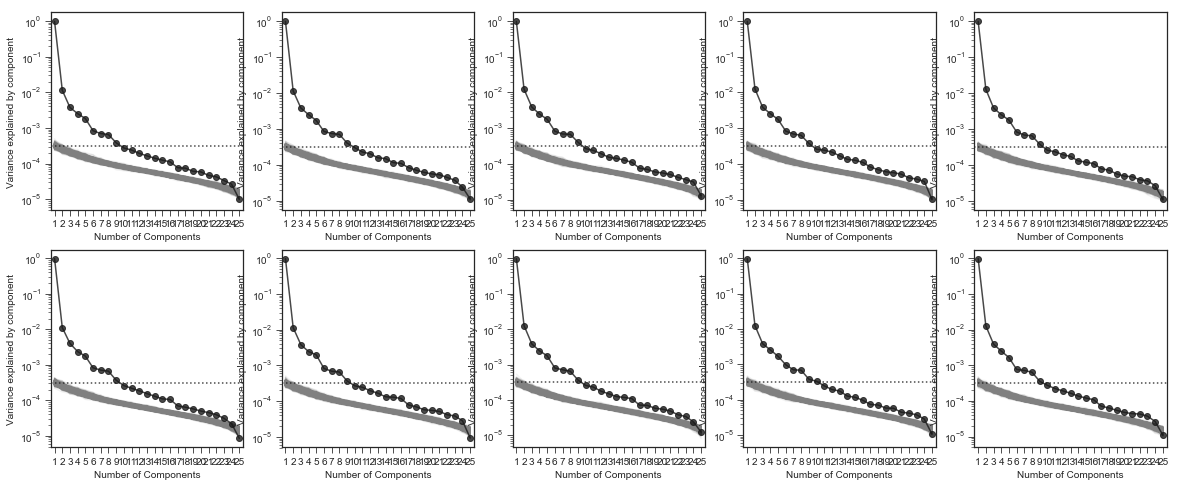

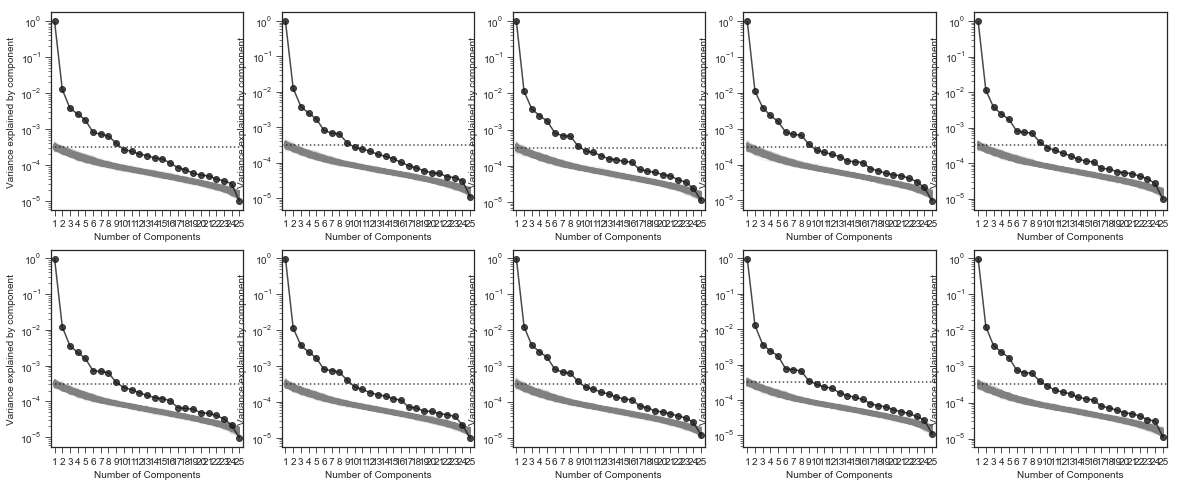

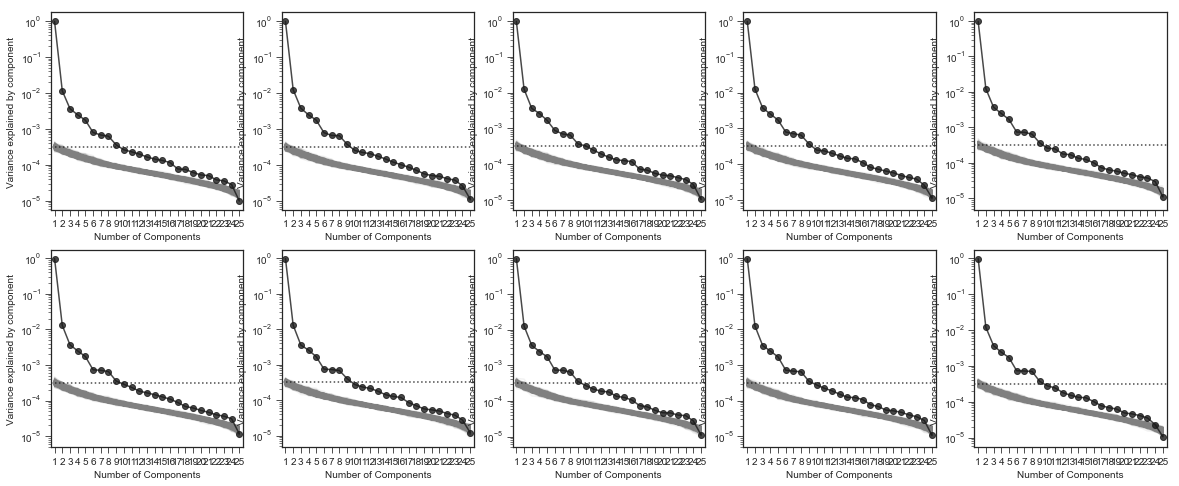

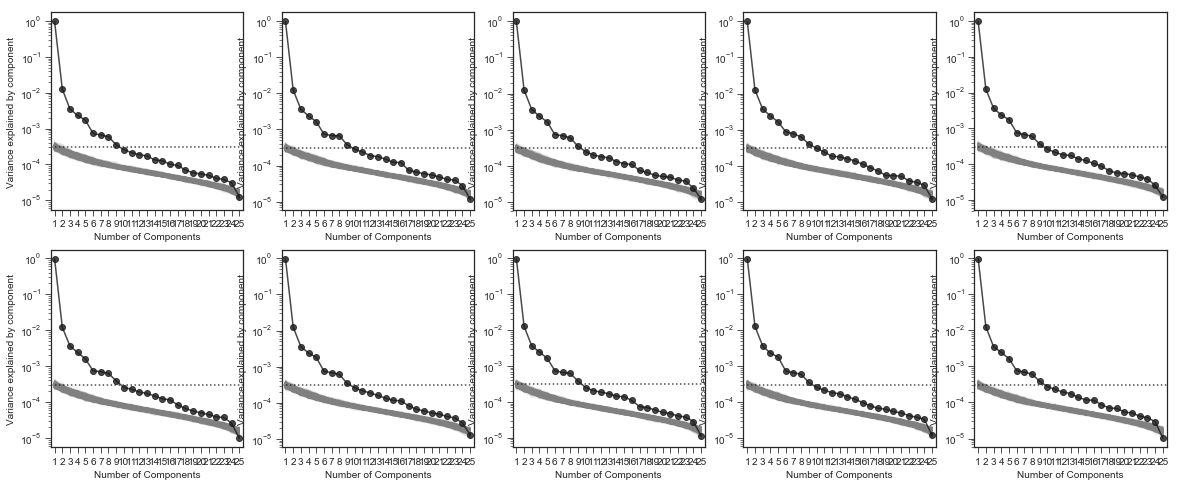

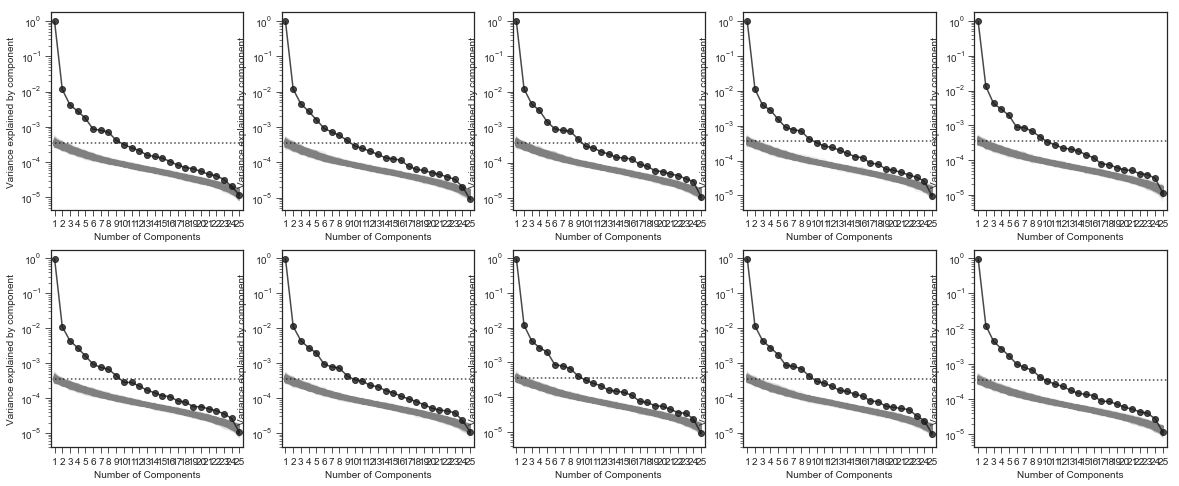

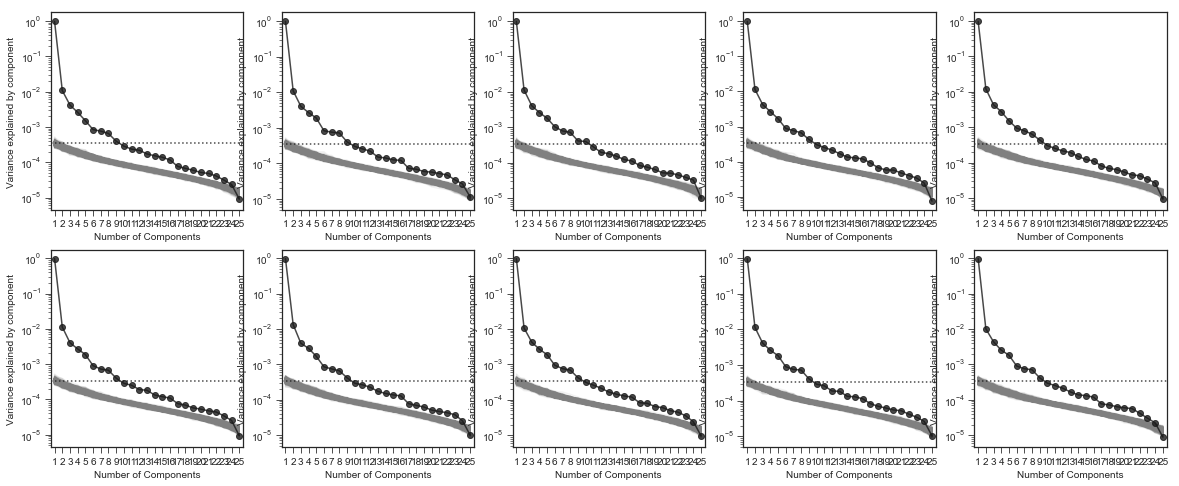

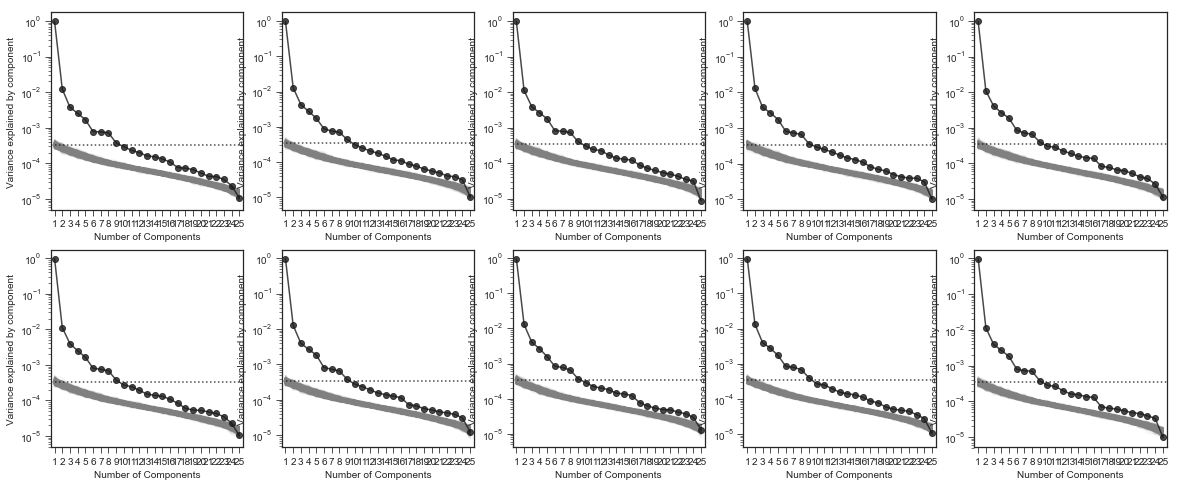

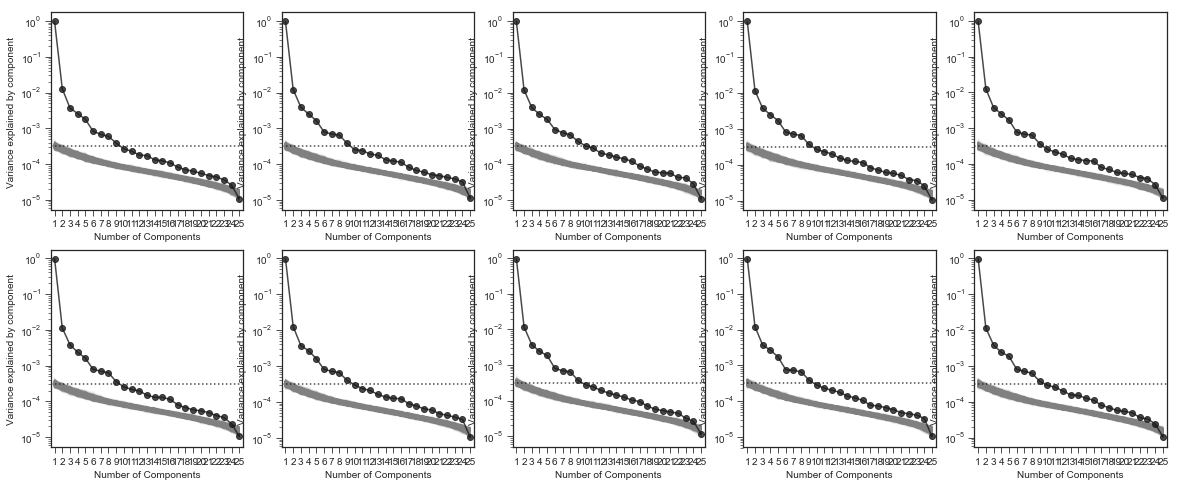

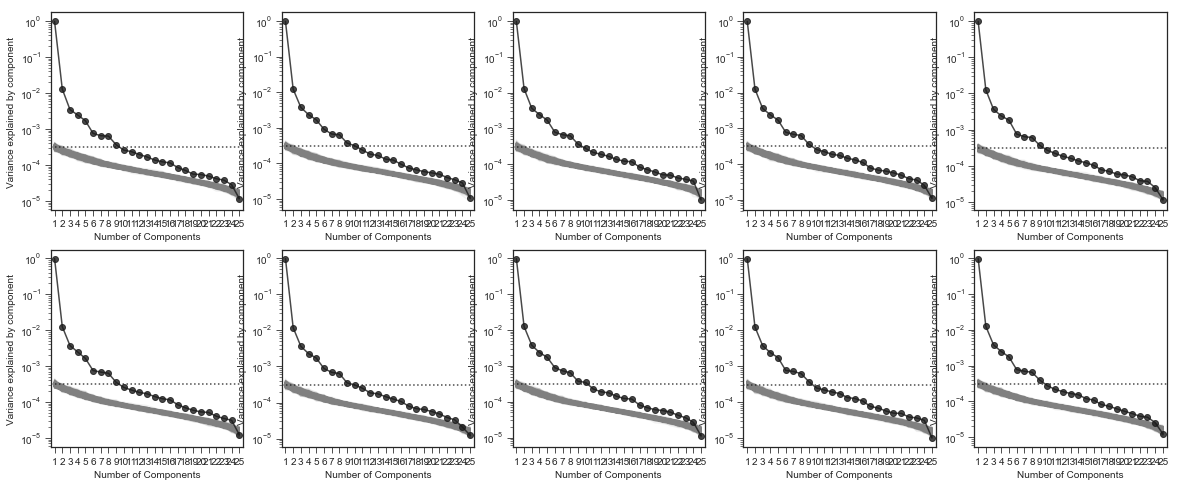

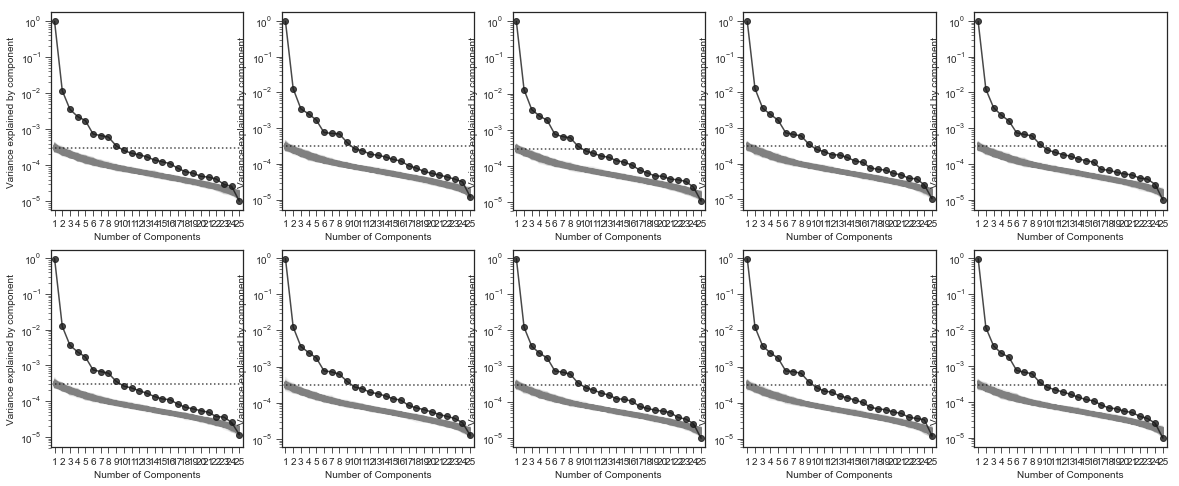

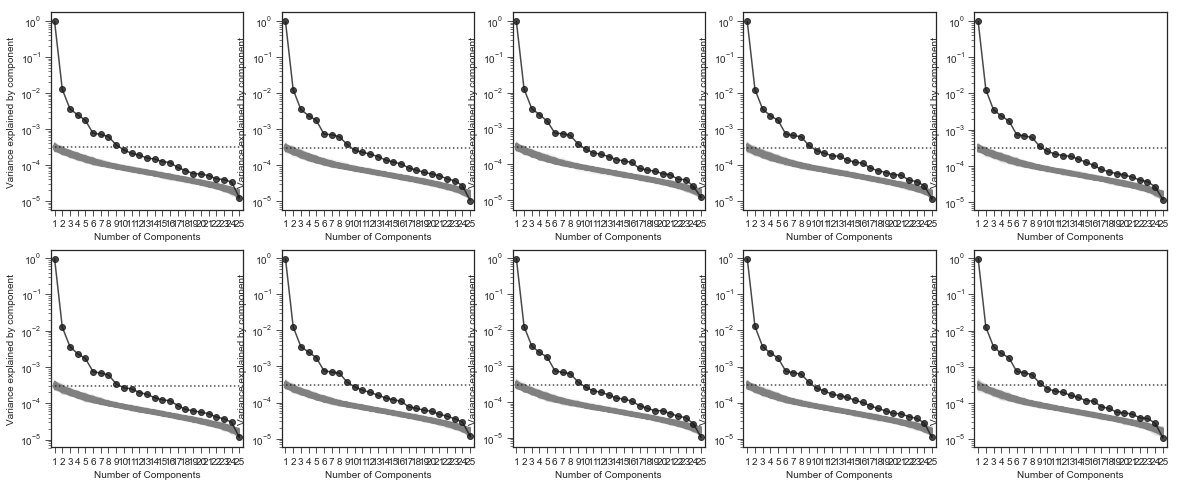

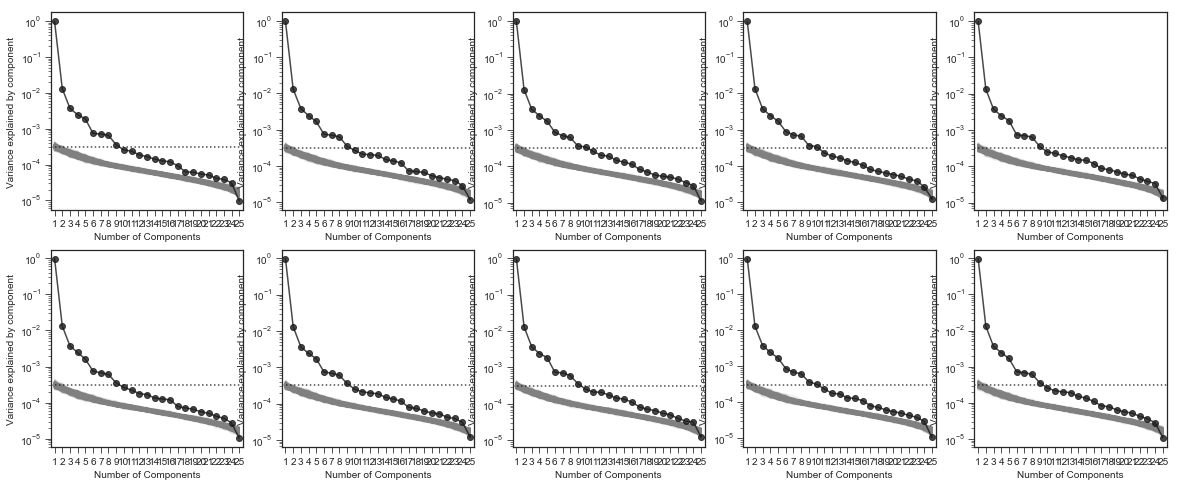

In [11]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')

datasets = {}


gene_list = ['IRA1_nonsense','GPB2','PDE2','Diploid','ExpNeutral']

n_trials = 10

# param_list = [(4,10),(3,10),(5,10),(4,5),(3,5),(5,5),(4,15),(3,15),(5,15)]
param_list = [(3,10),(4,10),(5,10),(10,10),(3,5),(4,5),(5,5),(10,5),(3,15),(4,15),(5,15),(10,15)]



for m,(max_train,max_test) in enumerate(param_list):
    print(max_train,max_test,((m+1)/(len(param_list))))
    
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    plt.title(f'{(max_train,max_test)}')
    
    datasets[f'{(max_train,max_test)}'] = {}
    
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
#         max_train = 4
#         max_test = 10

        training_bcs, testing_bcs = tools.select_train_test_mutants(this_data,max_train=max_train,max_test=max_test)

        datasets[f'{(max_train,max_test)}'][i] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
                      training_bcs,testing_bcs,gene_list,fixed_mutant_sets=True)


        these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])

        this_fitness = this_data[this_data['barcode'].isin(list(training_bcs)+list(testing_bcs))][these_cols].values

        this_error = this_data[this_data['barcode'].isin(list(training_bcs)+list(testing_bcs))][[col.replace('_fitness','_error') for col in these_cols ]].values

        tools.svd_noise_comparison_figure(ax,this_fitness,this_error,1000,yscale='log')

#     plt.savefig('')


([<matplotlib.axis.XTick at 0x1d19917f0>,
 <a list of 12 Text xticklabel objects>)

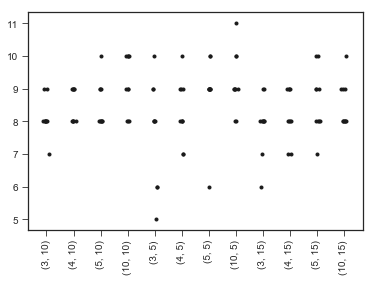

In [16]:
plt.figure()

for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
    
        model = datasets[f'{(max_train,max_test)}'][i]['CV_best_rank_index']
        
        plt.scatter(tools.jitter_point(m,0.05),model+1,marker='.',color='k')
    
plt.xticks(range(len(param_list)),[str(item) for item in param_list],rotation=90)
    
    

([<matplotlib.axis.XTick at 0x14f453f28>,
 <a list of 12 Text xticklabel objects>)

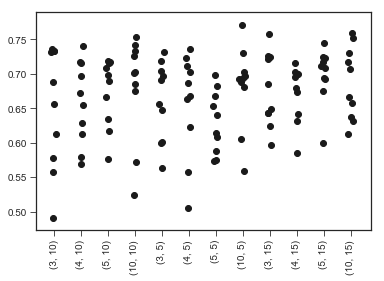

In [17]:
plt.figure()

for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
        
        dataset = datasets[f'{(max_train,max_test)}'][i]
     
        all_guesses = dataset['CV_all_guesses']
        both_old = dataset['both_old']
        dhats = dataset['dhats']
        this_fitness  = dataset['this_fitness']
        train  = dataset['train']
        test = dataset['test']
        both_new = dataset['both_new']
        guesses = dataset['guesses']
        model = dataset['CV_best_rank_index']
        test_conditions  = dataset['test_conditions']


        types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values

        new_mut_locs = dataset['mut_locs'][model][test[1]]

        old_cond_locs = dataset['cond_locs'][model][train[0]]

        new_cond_locs = dataset['cond_locs'][model][test[0]]

        these_sigmas = dataset['dimension_weights'][model]
        these_sigmas = these_sigmas[:model+1,:model+1]

        nonsubtle_fit = tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,test[0]],
                                                                      np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T)),types)[0]

        plt.scatter(tools.jitter_point(m,0.05),nonsubtle_fit,color='k')
    
plt.xticks(range(len(param_list)),[str(item) for item in param_list],rotation=90)
    
    

4 0.6995003277918794
9 0.6907695310957808
4 0.6938394713825398
9 0.6903173952584878
4 0.685114357622292
9 0.7039430790086909
4 0.5375155148999242
9 0.620234789563438
4 0.6875746975962318
9 0.7309455156399587
4 0.6762901634532403
9 0.7090805537247679
4 0.7075126835406851
9 0.7071943399838247
4 0.685257254593292
9 0.7357175487773939
4 0.6795456309336492
9 0.7222714925432252
4 0.5819625903477103
9 0.6385251191592767


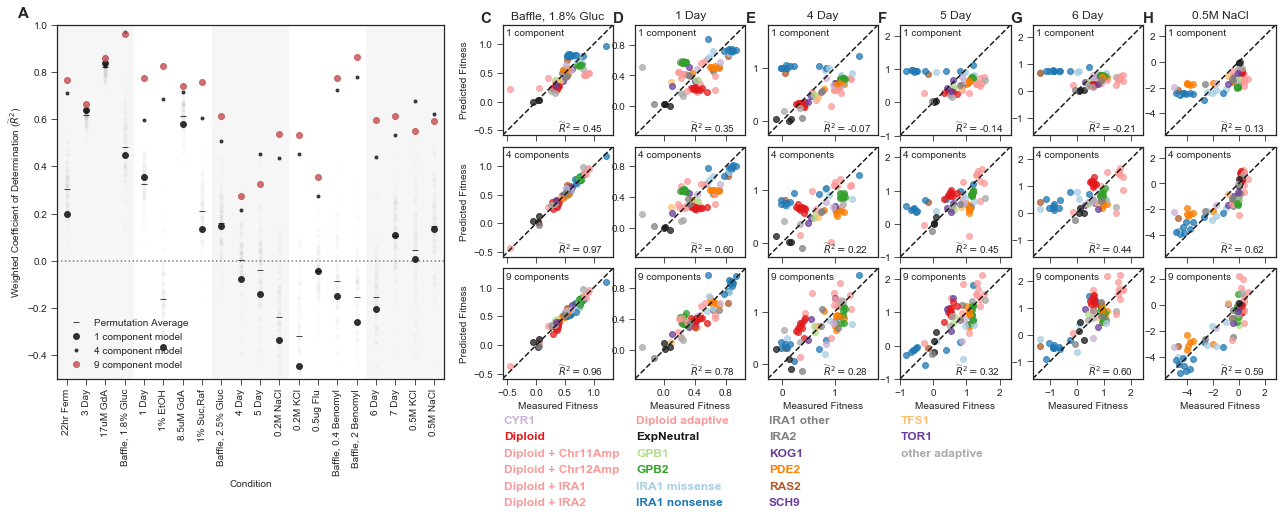

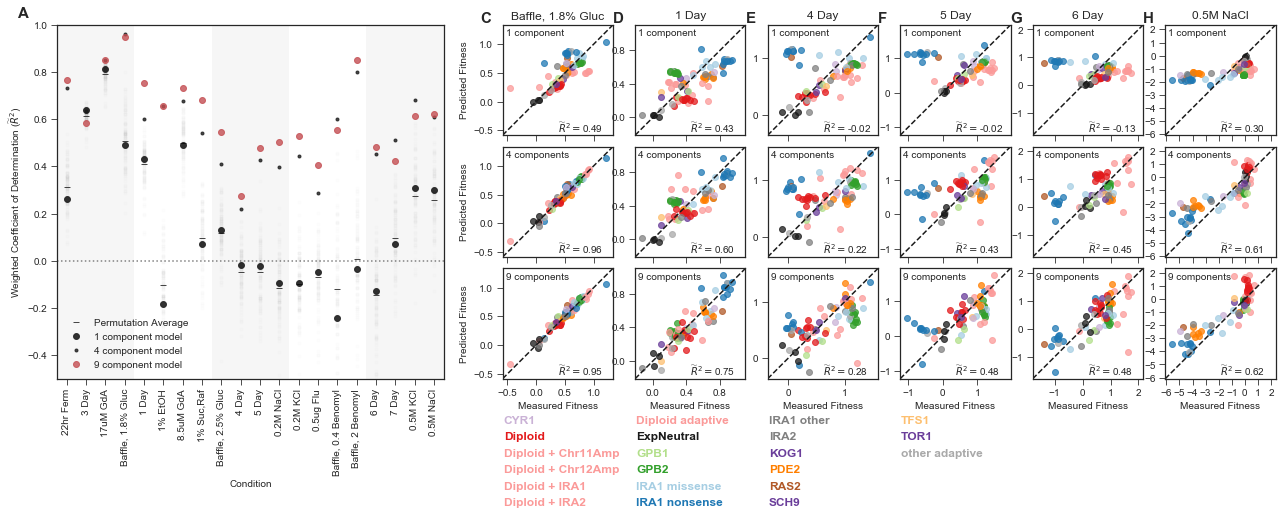

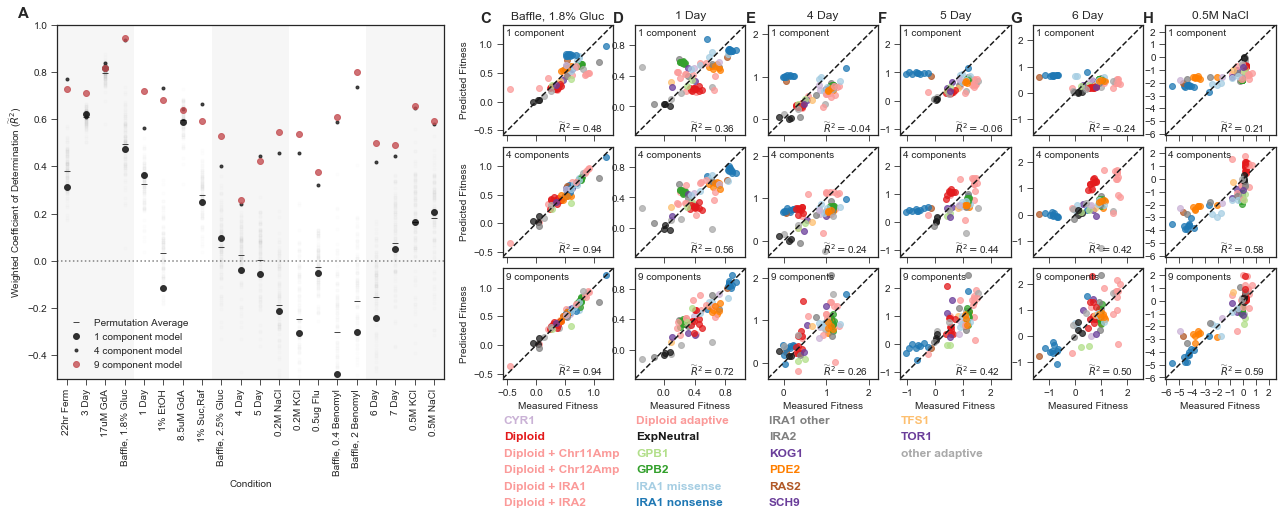

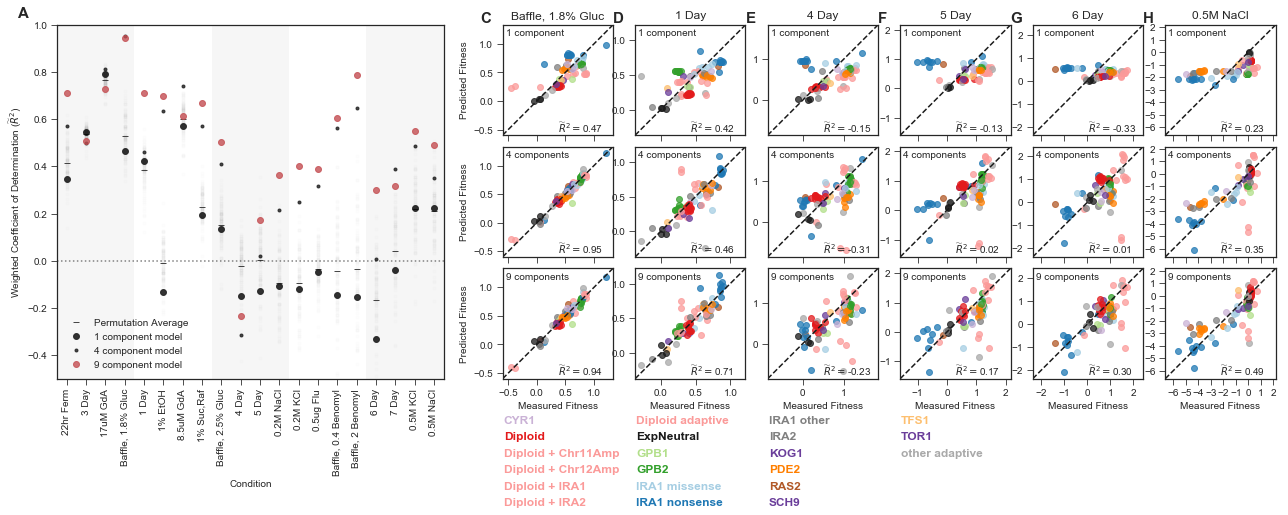

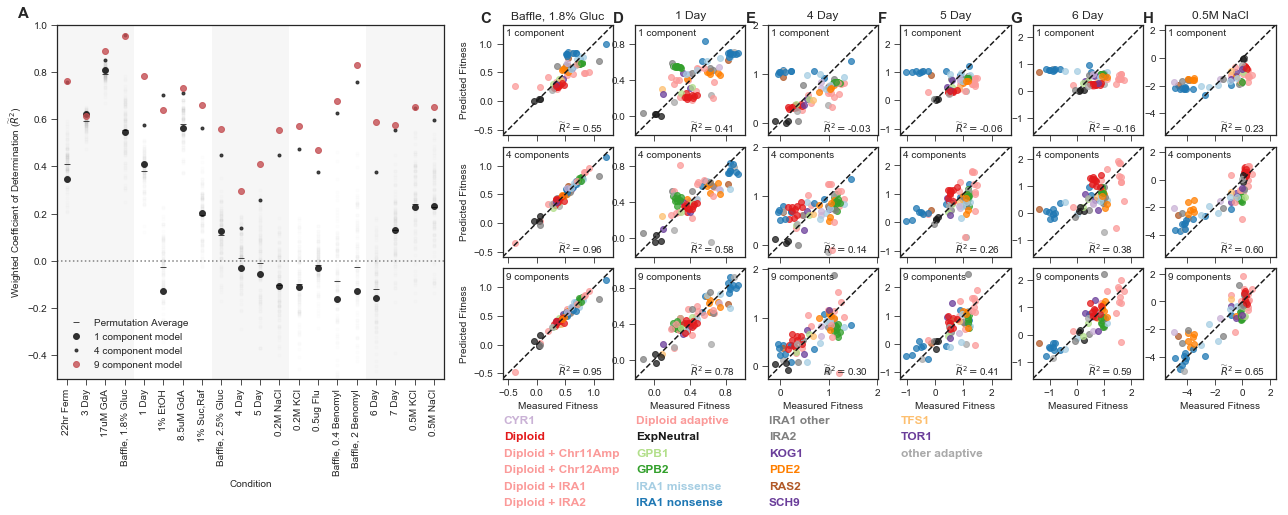

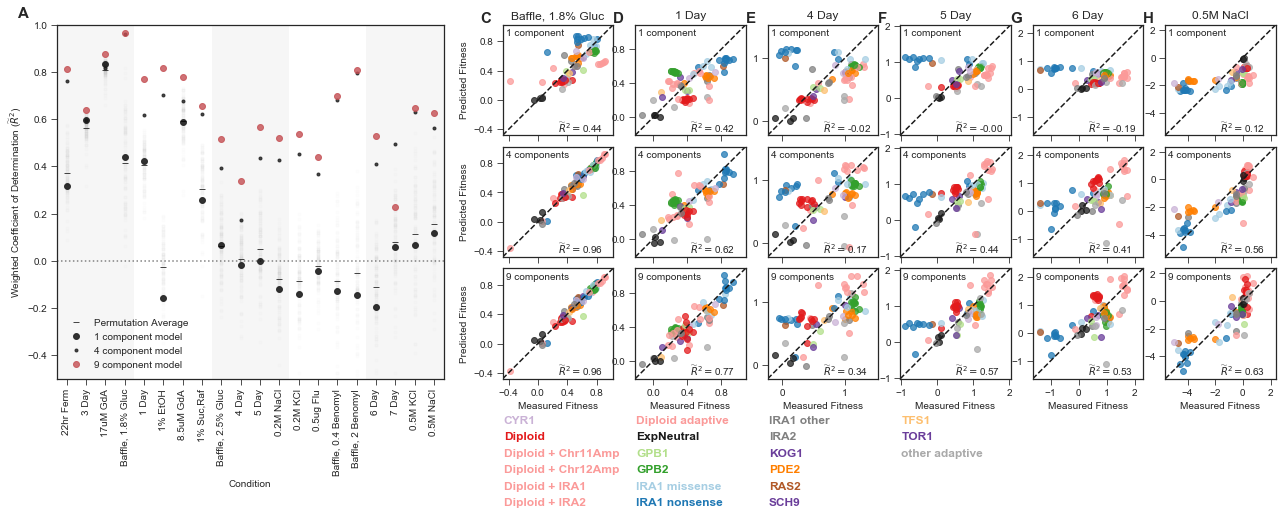

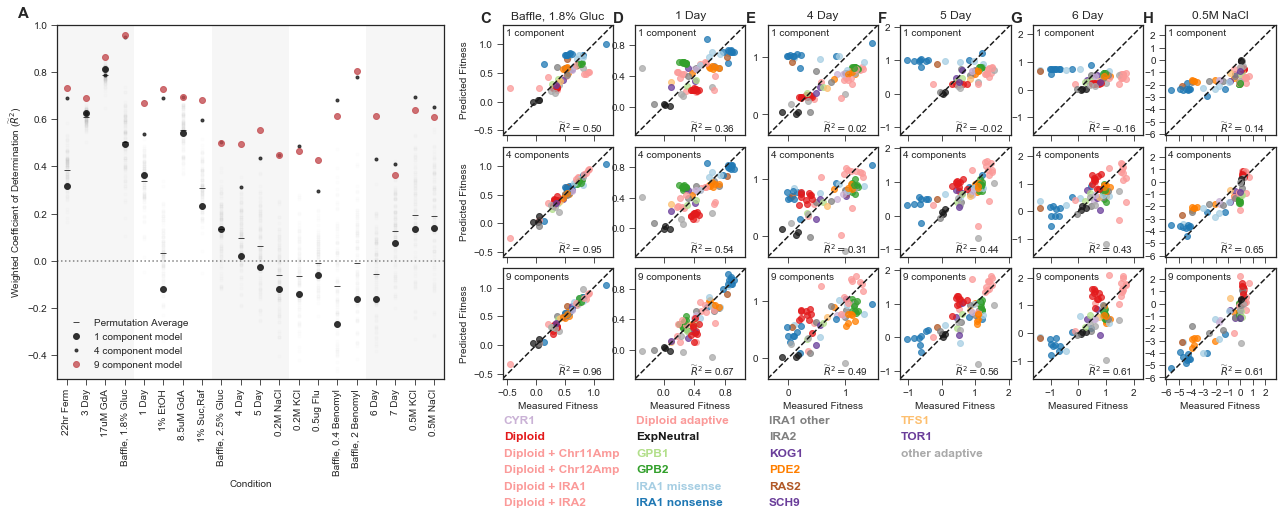

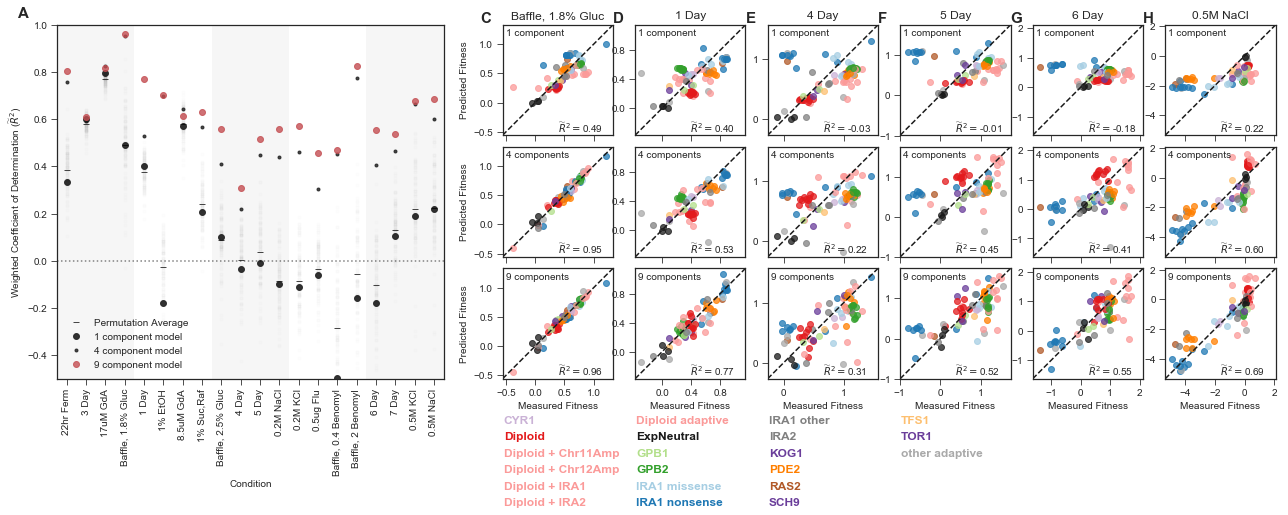

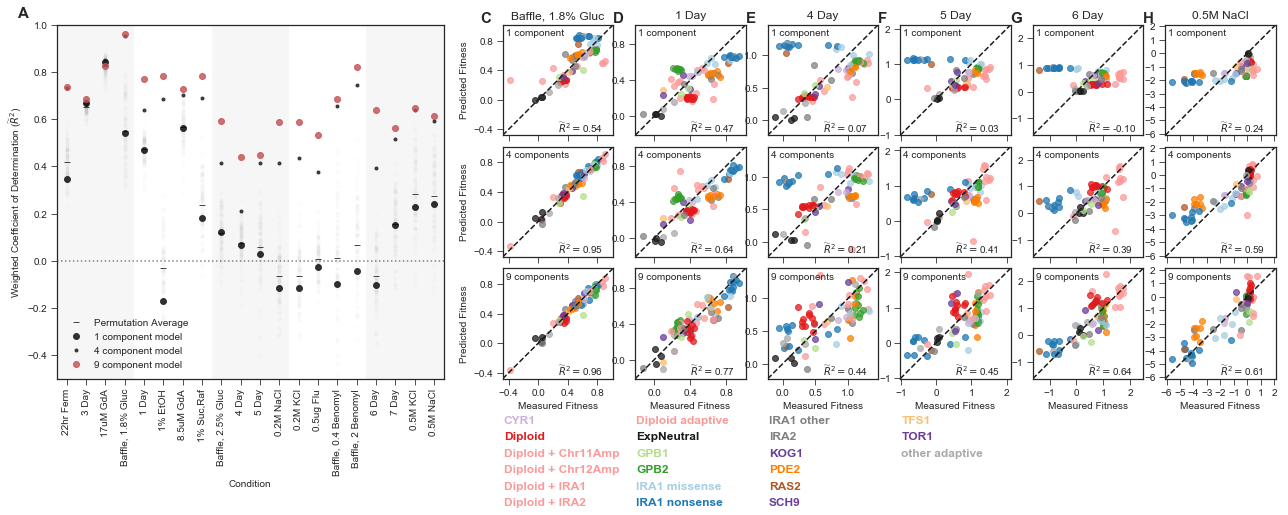

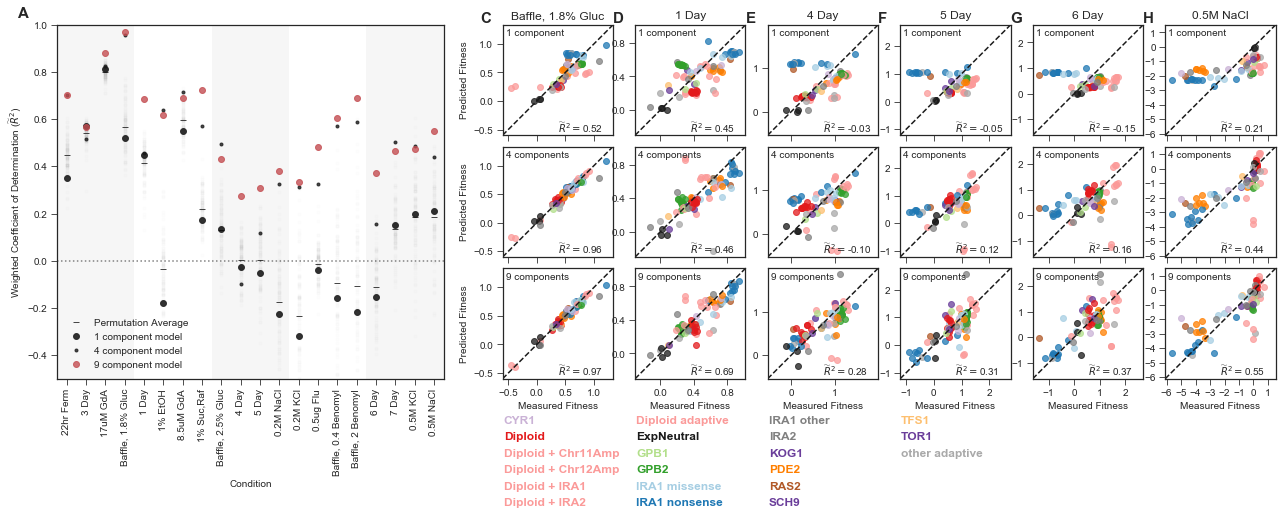

In [10]:
for i in range(n_trials):
#     example_names = ['1.8%','Resp_24hr_Transfer','1BB_1%EtOH','Ben2','1BB_0.5MNaCl']
#     # graphs.Figure4_w_examples(datasets['batch_to_nonbatch_wothers_fixed_mutants'],gene_list,this_data,[col + '_fitness' for col in example_names],model=4)
#     interesting_conditions = ['Resp_24hr_Transfer_fitness','1BB_SucRaf_fitness','2.5%_fitness','Resp_4Day_Transfer_fitness', '1BB_0.5ugFlu_fitness','Resp_6Day_Transfer_fitness']
#     example_names = ['1.8%','Resp_24hr_Transfer','1BB_SucRaf','2.5%','Resp_4Day_Transfer', '1BB_0.5ugFlu','Resp_6Day_Transfer','1BB_0.5MNaCl']
    example_names = ['1.8%','Resp_24hr_Transfer','Resp_4Day_Transfer','Resp_5Day_Transfer','Resp_6Day_Transfer','1BB_0.5MNaCl']
    
    graphs.Figure4_w_examples(datasets[i],gene_list,this_data,[col + '_fitness' for col in example_names],models=[3,8],weighted=True)
# plt.savefig(f'Figure4_with_prediction_examples_unweighted.pdf',bbox_inches='tight')

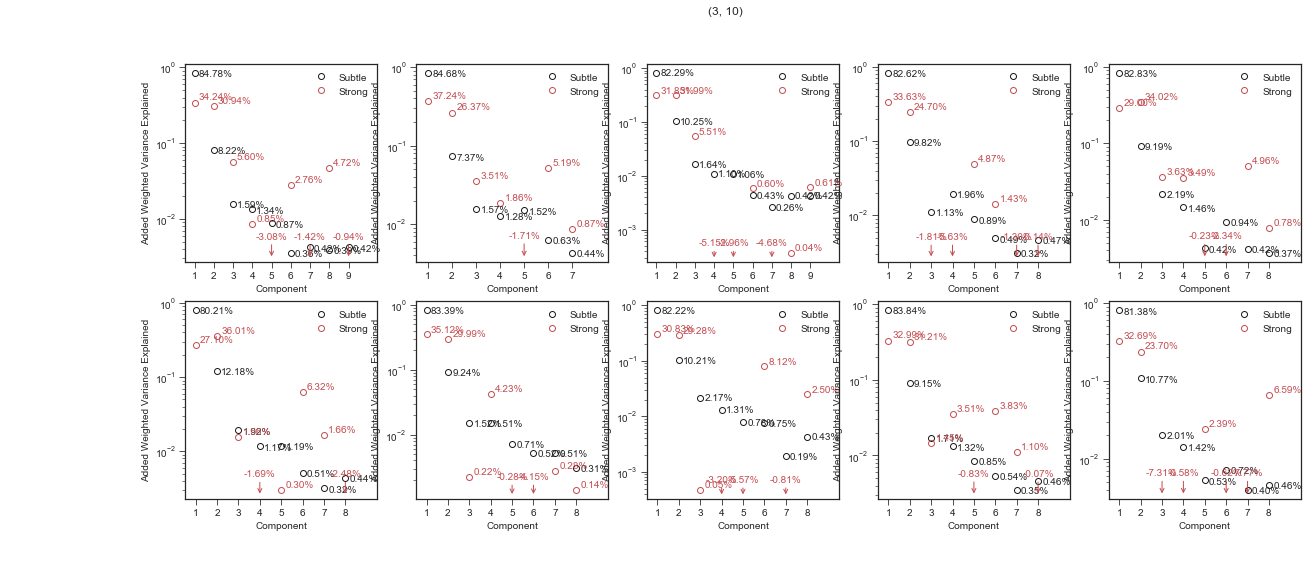

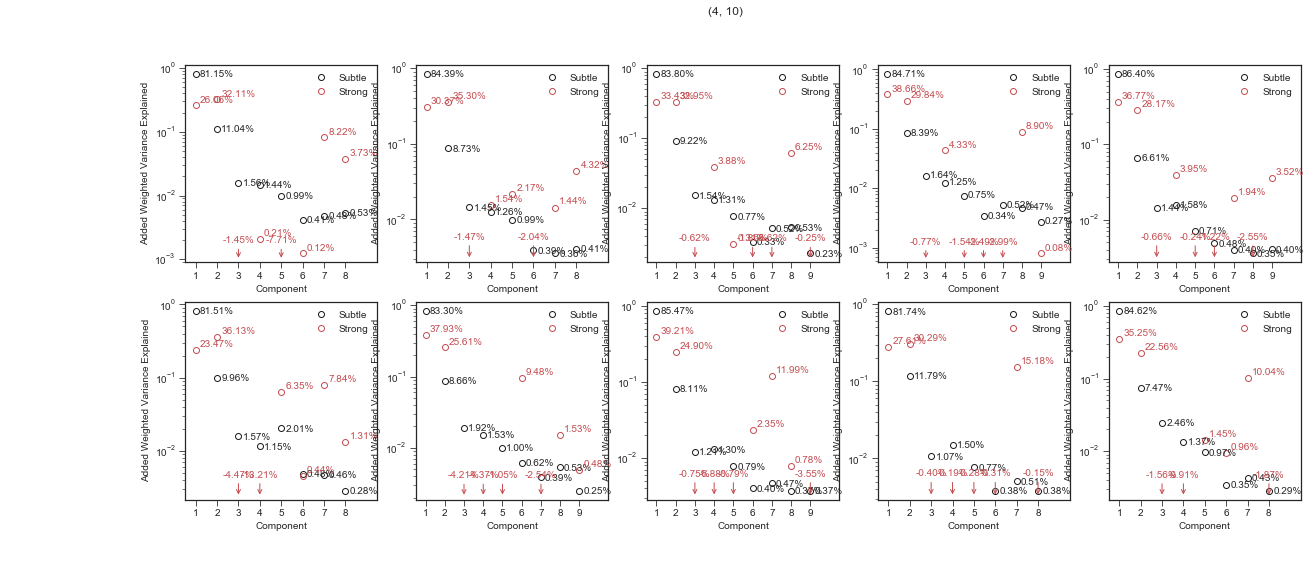

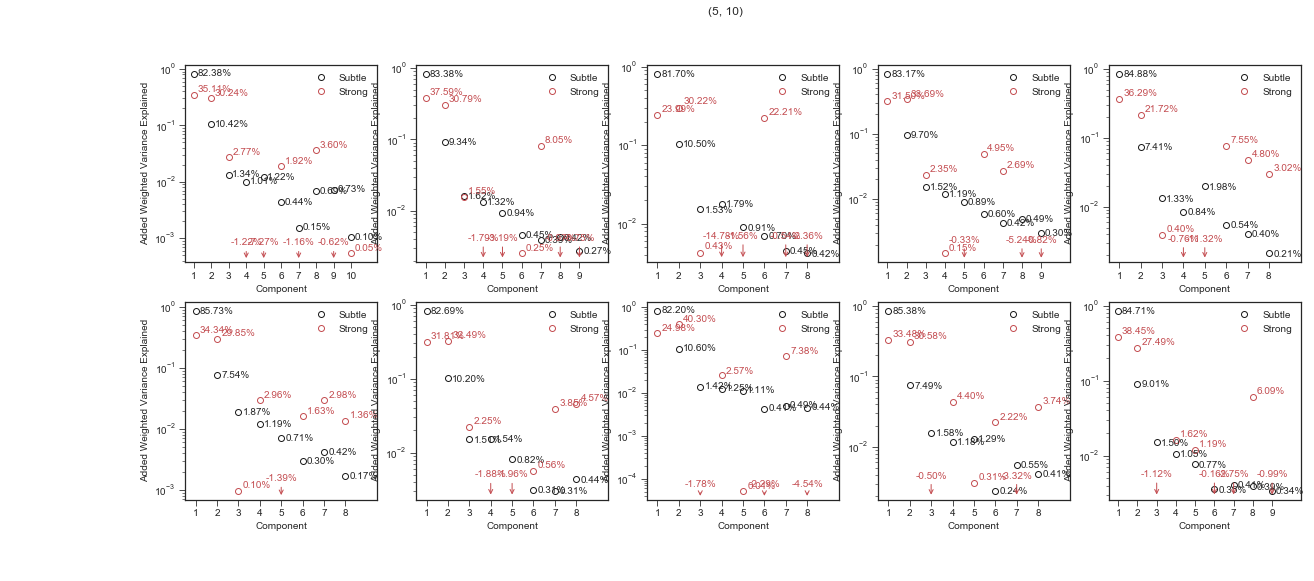

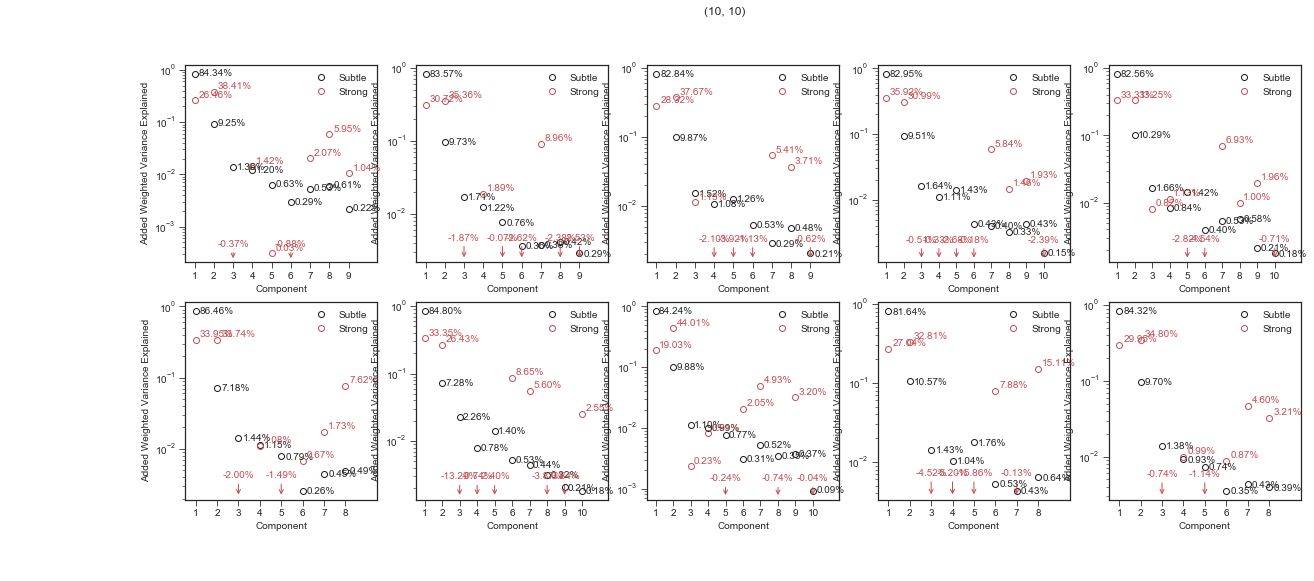

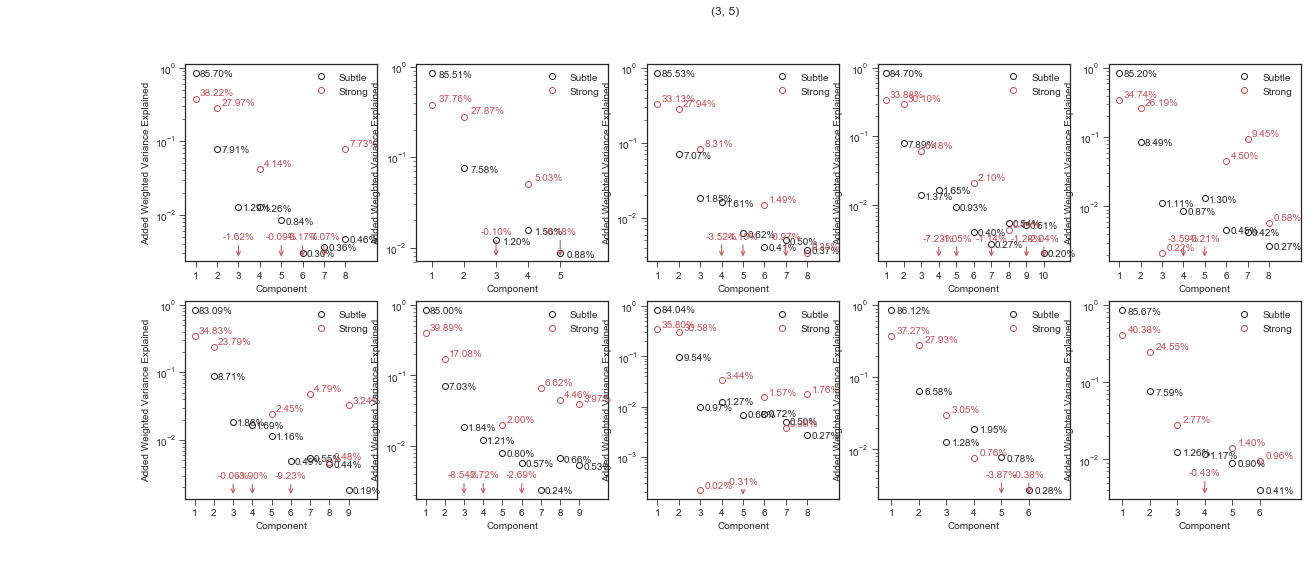

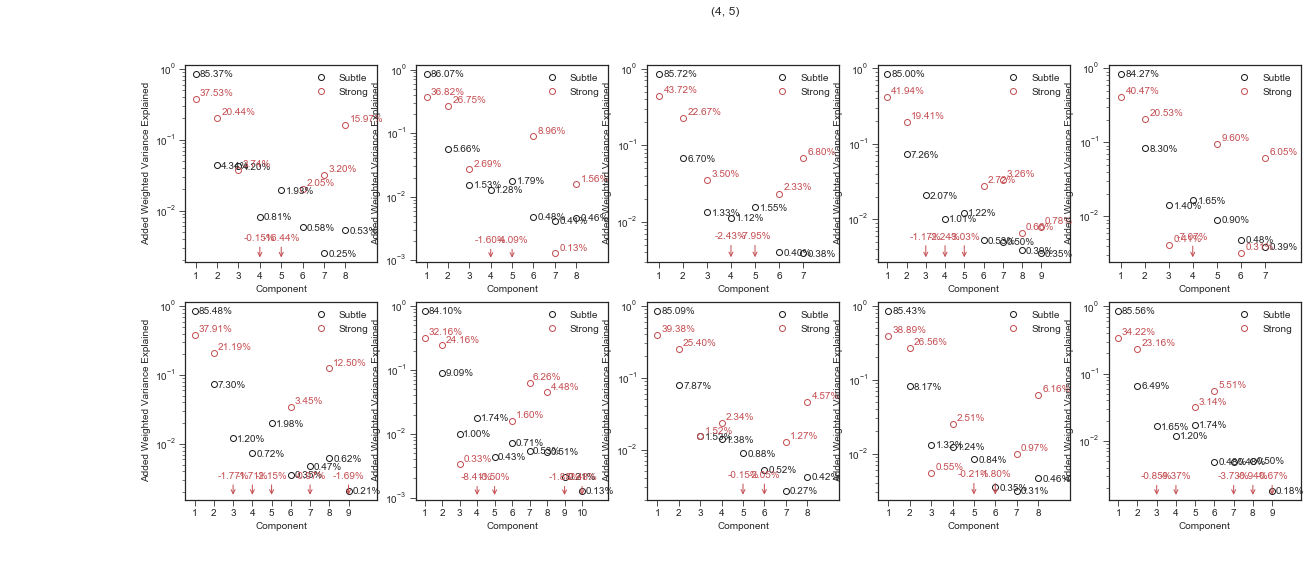

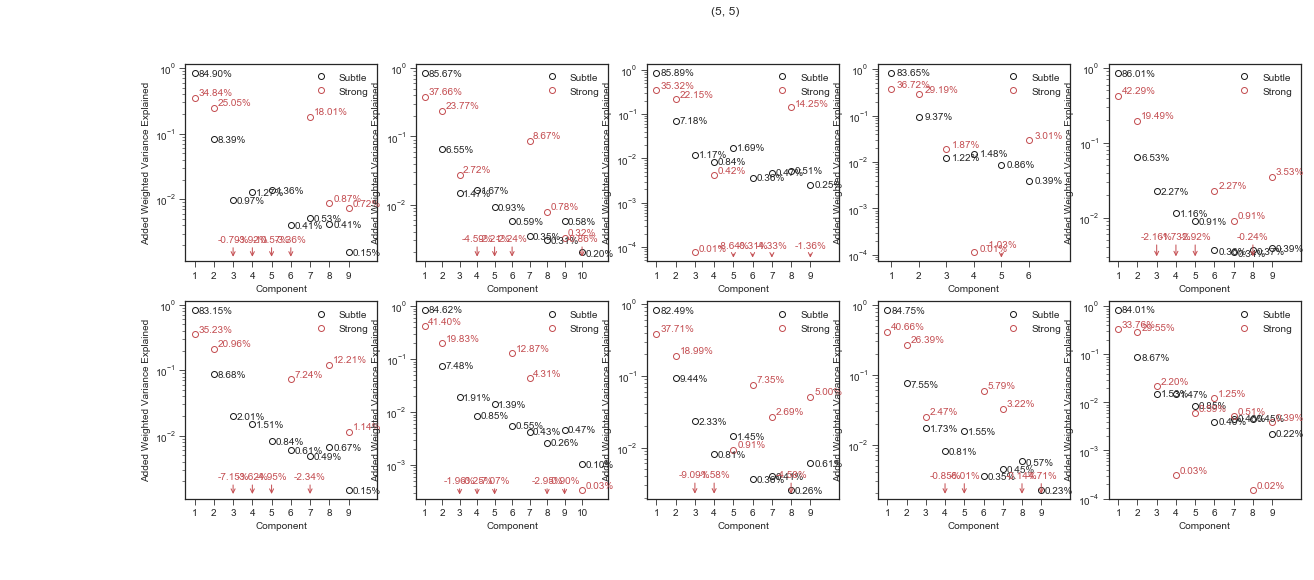

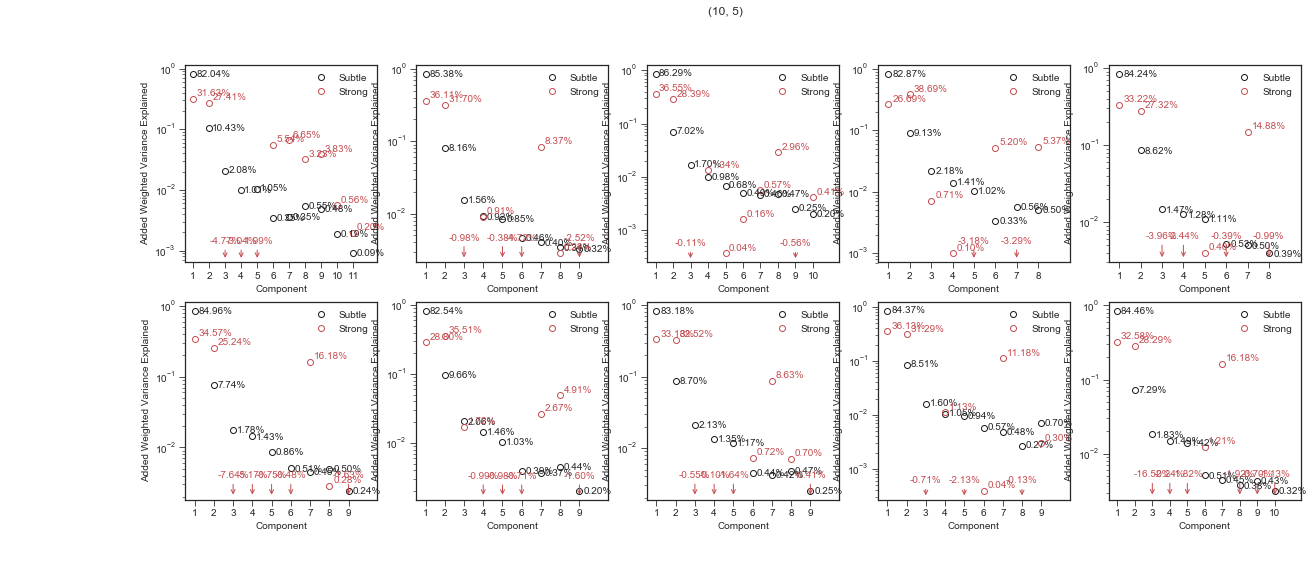

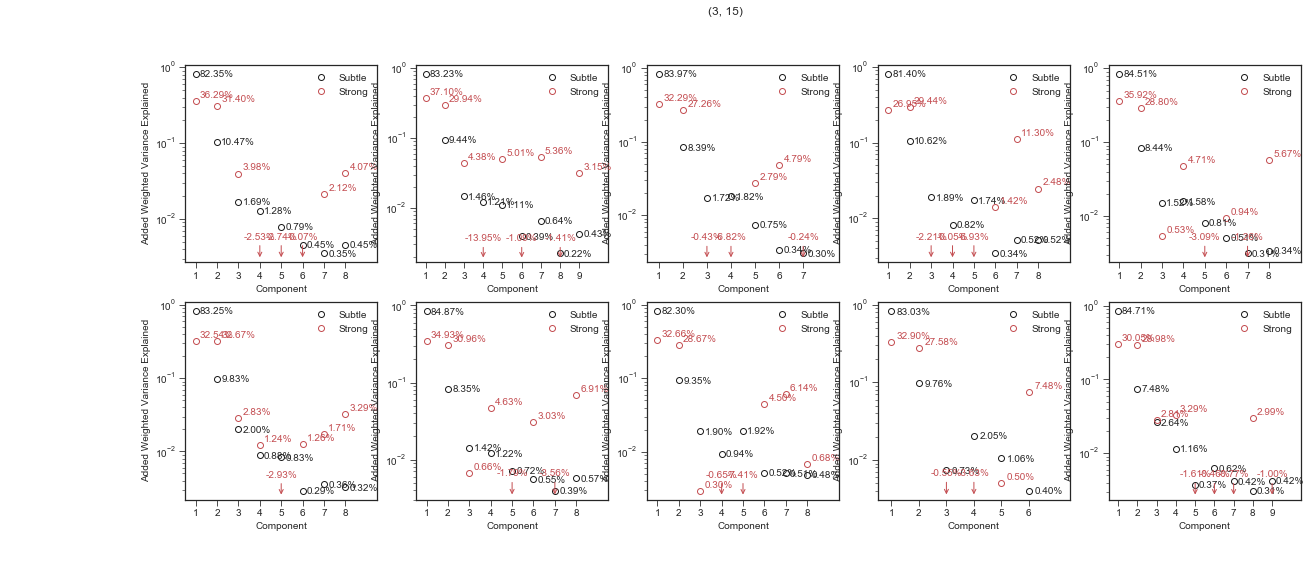

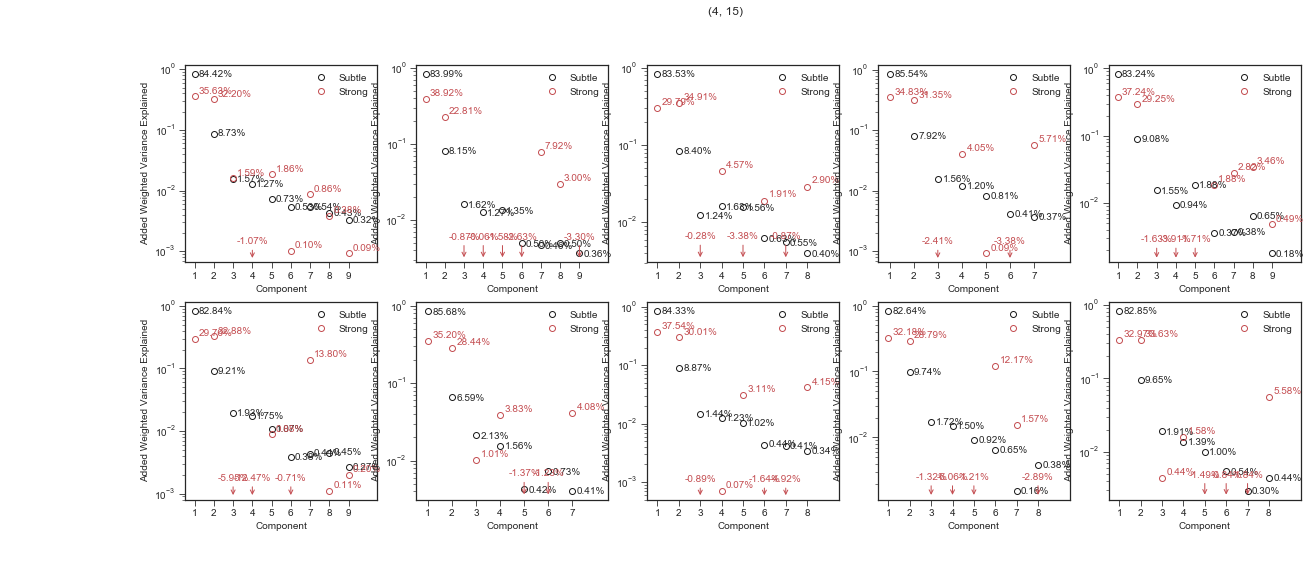

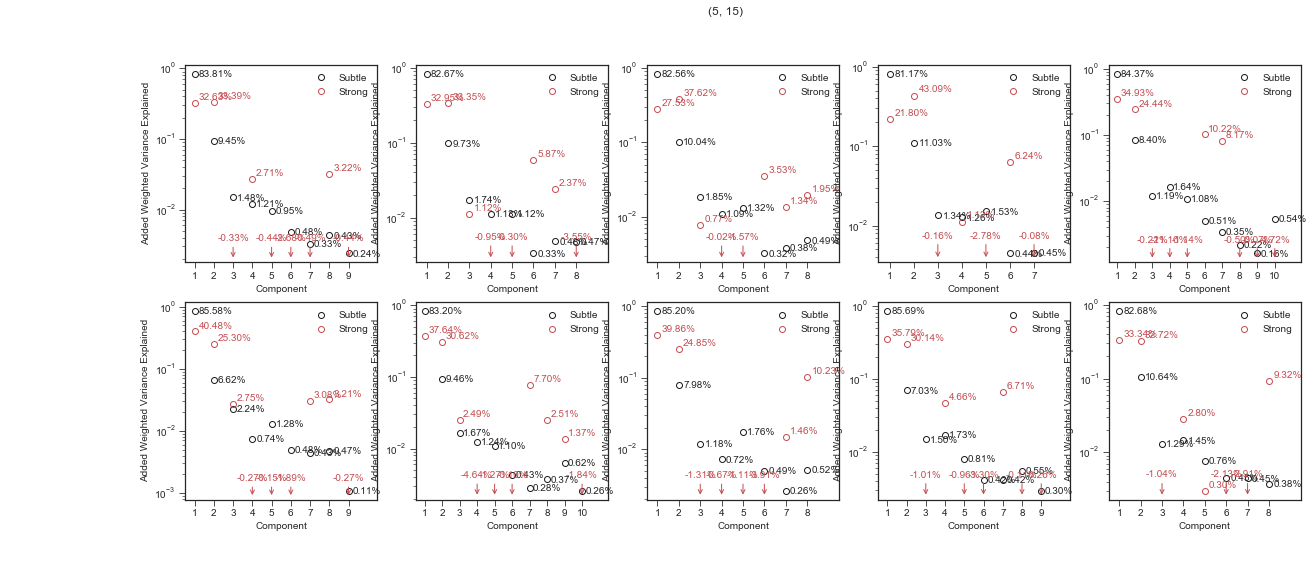

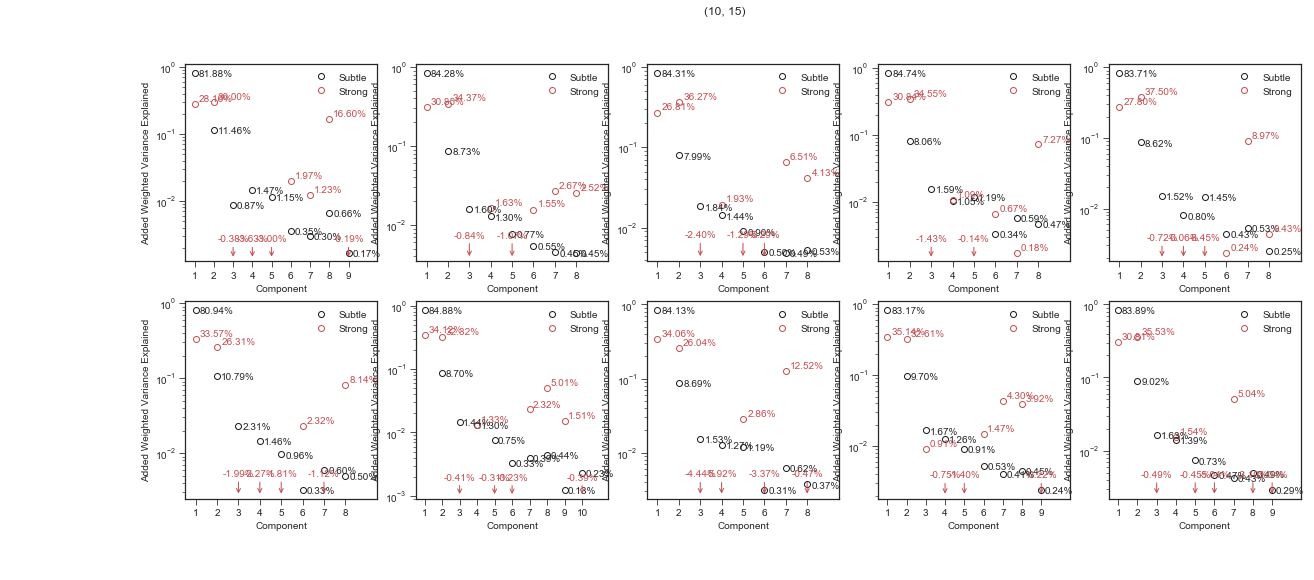

In [55]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')

weighted = False

ns_fits = {}
s_fits = {}

for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    plt.suptitle(f'{(max_train,max_test)}')
    
    ns_fits[f'{(max_train,max_test)}'] = {}
    s_fits[f'{(max_train,max_test)}'] = {}
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        
        dataset = datasets[f'{(max_train,max_test)}'][i]
        n_perms = 100
        weighted= True
        ymax = 1.0
        ymin = -1.0

        all_guesses = dataset['CV_all_guesses']
        both_old = dataset['both_old']
        dhats = dataset['dhats']
        this_fitness  = dataset['this_fitness']
        train  = dataset['train']
        test = dataset['test']
        both_new = dataset['both_new']
        guesses = dataset['guesses']
        model = dataset['CV_best_rank_index']
        test_conditions  = dataset['test_conditions']
        
        end = model
        nonsubtle_fits = []
        subtle_fits = []
        overall_subtle = []
        overall_nonsubtle = []
        for model in range(20):
            # this_gene_data = this_data[this_data['barcode'].isin(test_mutant_data)]
            types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values

            new_mut_locs = dataset['mut_locs'][model][test[1]]

            old_cond_locs = dataset['cond_locs'][model][train[0]]

            new_cond_locs = dataset['cond_locs'][model][test[0]]

            these_sigmas = dataset['dimension_weights'][model]
            these_sigmas = these_sigmas[:model+1,:model+1]

            overall_nonsubtle.append(tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,test[0]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T)),types,weighted=weighted)[0])

            this_sse = np.asarray([tools.var_explained_weighted_by_type(this_fitness[test[1],test[0][i]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T))[:,i],types,weighted=weighted)[0] for i in range(new_cond_locs.shape[0])])
            nonsubtle_fits.append(this_sse)
            

            overall_subtle.append(tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,train[0]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,old_cond_locs.T)),types,weighted=weighted)[0])


            subtle_sse = np.asarray([tools.var_explained_weighted_by_type(this_fitness[test[1],train[0][i]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,old_cond_locs.T))[:,i],types,weighted=weighted)[0] for i in range(old_cond_locs.shape[0])])


            subtle_fits.append(subtle_sse)
        
        ns_fits[f'{(max_train,max_test)}'][i] = nonsubtle_fits
        s_fits[f'{(max_train,max_test)}'][i] = subtle_fits
#         end = model

        plt.plot([overall_subtle[0]]+list(np.diff(overall_subtle))[:end],'o',markeredgecolor='k',markerfacecolor='None',label='Subtle')
        plt.ylabel('Added Weighted Variance Explained')
        # plt.yscale('log',basey=10)

        for i,item in enumerate([overall_subtle[0]]+list(np.diff(overall_subtle))[:end]):
        #     plt.annotate(xy=(i+0.2,item+0.0*item),s=f'{item*100:.2f}% ({overall_subtle[i]*100:.2f}%)',transform=plt.gca().transAxes)
            plt.annotate(xy=(i+0.2,item-0.1*item),s=f'{item*100:.2f}%',transform=plt.gca().transAxes)

        plt.plot([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end],'o',markeredgecolor='r',markerfacecolor='None',label='Strong')
        plt.ylabel('Added Weighted Variance Explained')
        plt.yscale('log',basey=10)
        plt.xticks(range(len(overall_subtle[:end+1])),range(1,len(overall_subtle[:end+1])+1))
        plt.xlabel('Component')

        for i,item in enumerate([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end]):
            plt.annotate(xy=(i+0.2,item+0.1*item),s=f'{item*100:.2f}%',transform=plt.gca().transAxes,color='r')


        ymin,ymax = plt.ylim()
        for i,item in enumerate([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end]):
            if item < 0:
                plt.annotate(xytext=(i,2*ymin),xy=(i,ymin+0.1*ymin),s=f'{item*100:.2f}%',transform=plt.gca().transAxes,color='r',
                             ha='center',arrowprops=dict(arrowstyle='->',color='r'))
    #             plt.annotate(xytext=(i,2*ymin),xy=(i,ymin+0.1*ymin),s="",transform=plt.gca().transAxes,color='r',
    #                  ha='center',arrowprops=dict(arrowstyle='->',color='r'))

        #     plt.annotate(xy=(i+0.2,item+0.0*item),s=f'{item*100:.2f}% ({overall_subtle[i]*100:.2f}%)',transform=plt.gca().transAxes)

        plt.xlim(-0.5,end+1.5)
#         plt.title('Contribution of components')
        plt.legend()
    

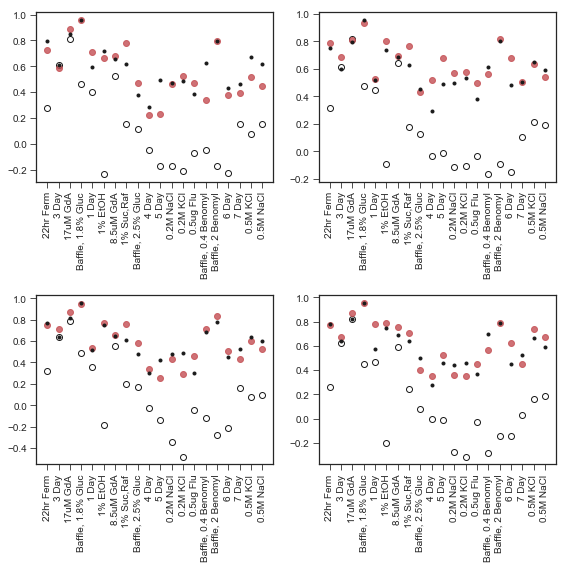

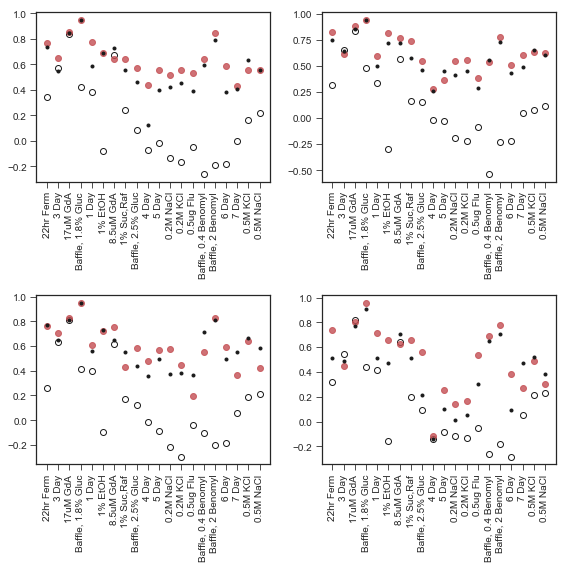

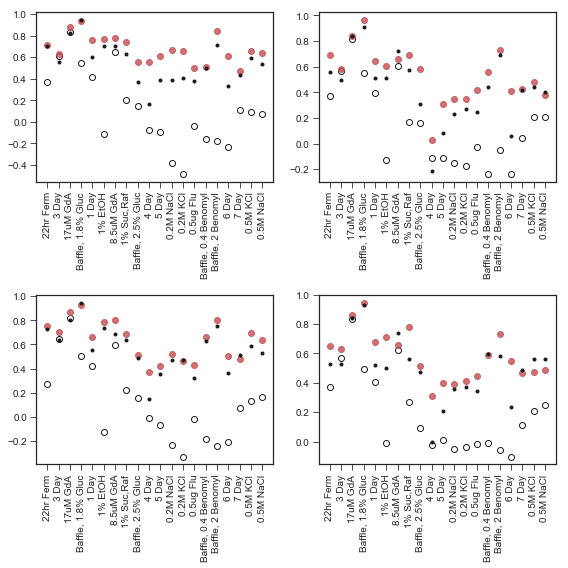

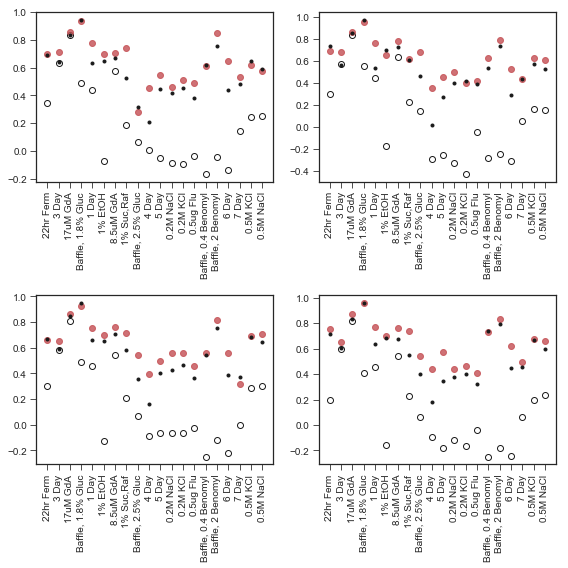

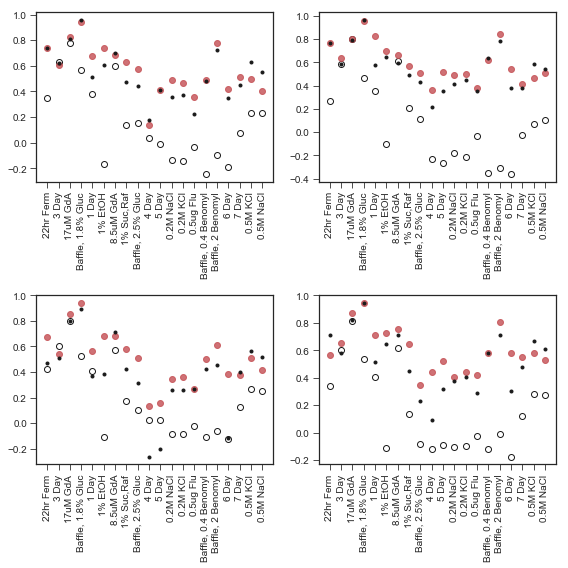

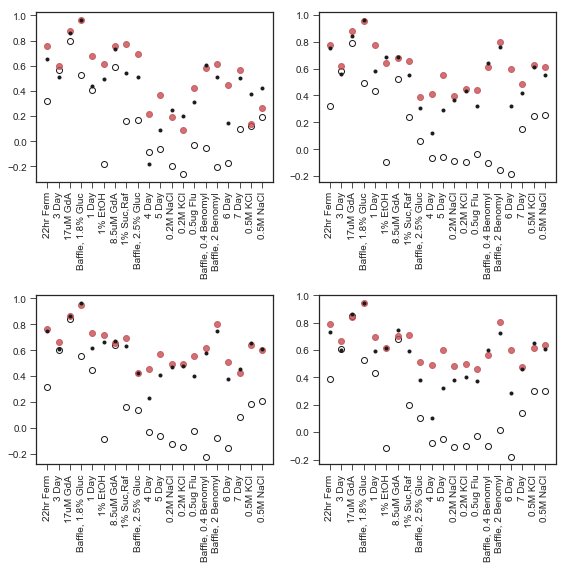

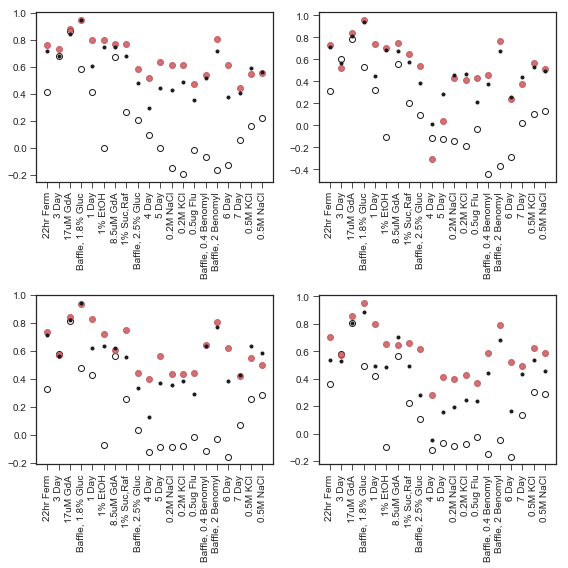

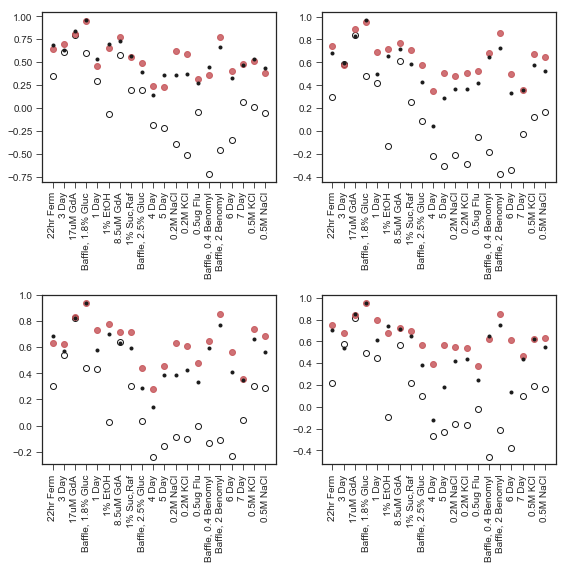

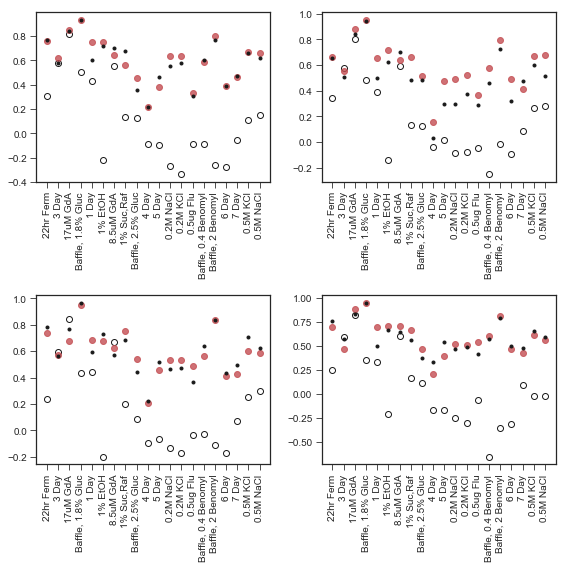

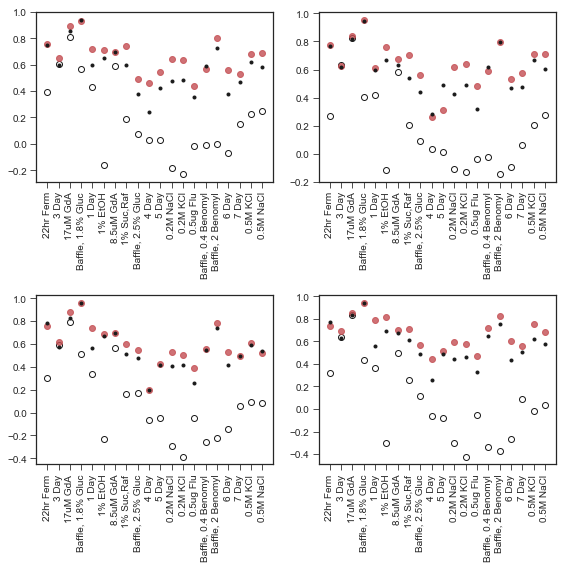

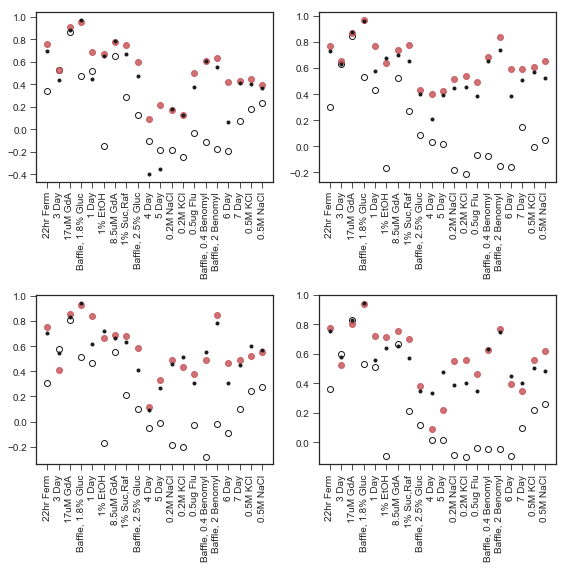

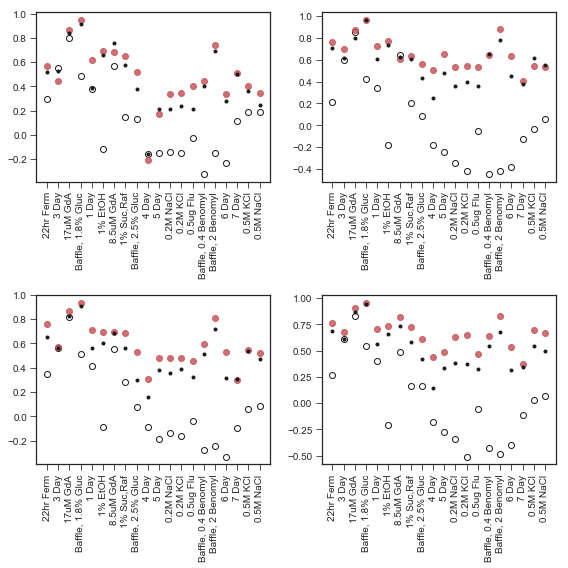

In [8]:
for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    
#     ns_fits[f'{(max_train,max_test)}'] = {}
#     s_fits[f'{(max_train,max_test)}'] = {}
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        model = datasets[f'{(max_train,max_test)}'][i]['CV_best_rank_index']
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][0],'ko',markeredgecolor='k',markerfacecolor='None')
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][model],'ro',alpha=0.8)
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][3],'k.')
        
        plt.xticks(range(len(ns_fits[f'{(max_train,max_test)}'][i][3])),[renamed_conditions[col.replace('_fitness','')] for col in sorted_nonm3_cols[first_nonsubtle:]],rotation=90)
        plt.tight_layout()
        

In [22]:
test_conditions = dataset['test_conditions']
interesting_conditions = ['Resp_24hr_Transfer_fitness','1BB_SucRaf_fitness','2.5%_fitness',
                          'Resp_4Day_Transfer_fitness','Resp_5Day_Transfer_fitness',
                          '1BB_0.5ugFlu_fitness','Resp_6Day_Transfer_fitness']
interesting_conditions = ['Resp_24hr_Transfer_fitness','Resp_4Day_Transfer_fitness',
                          'Resp_5Day_Transfer_fitness','Resp_6Day_Transfer_fitness']

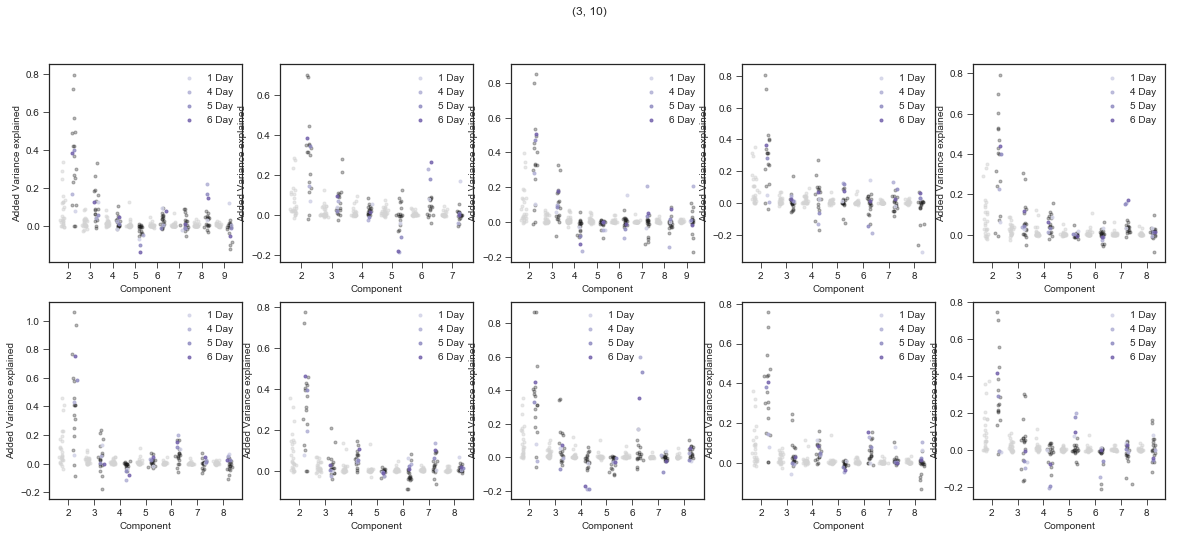

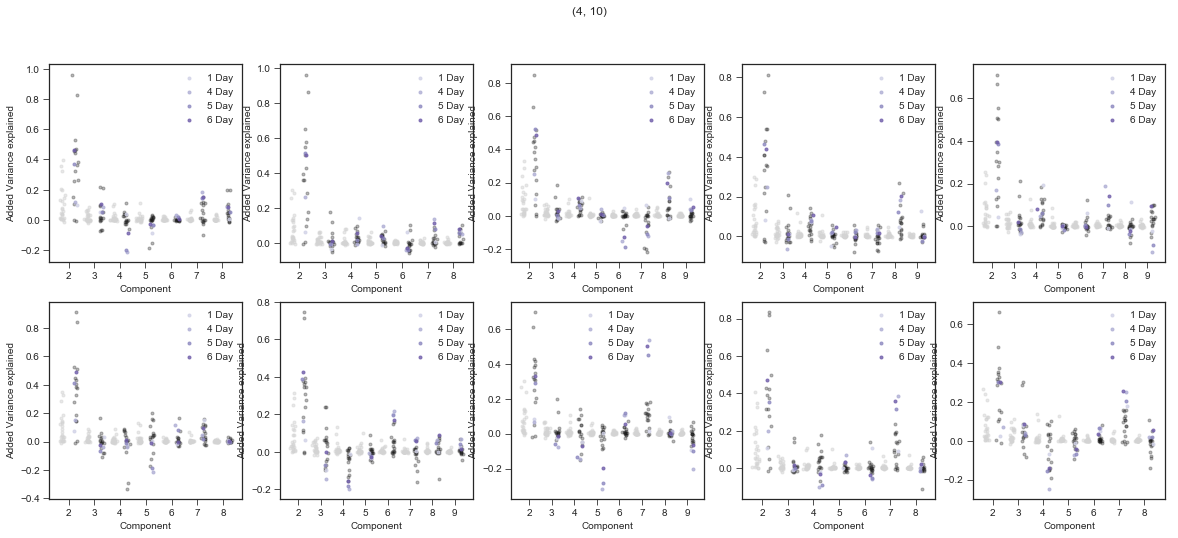

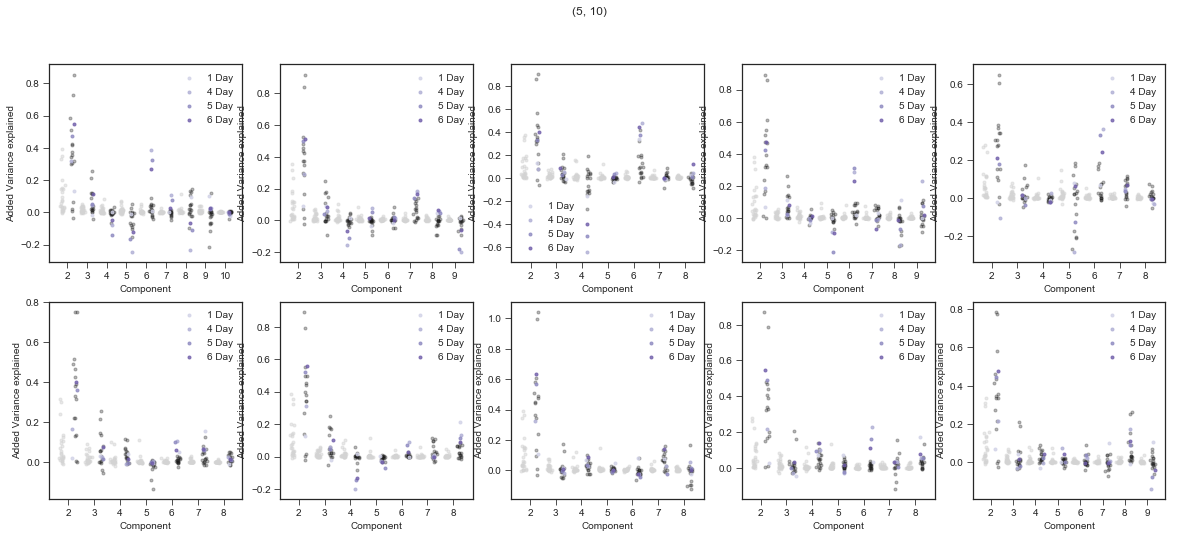

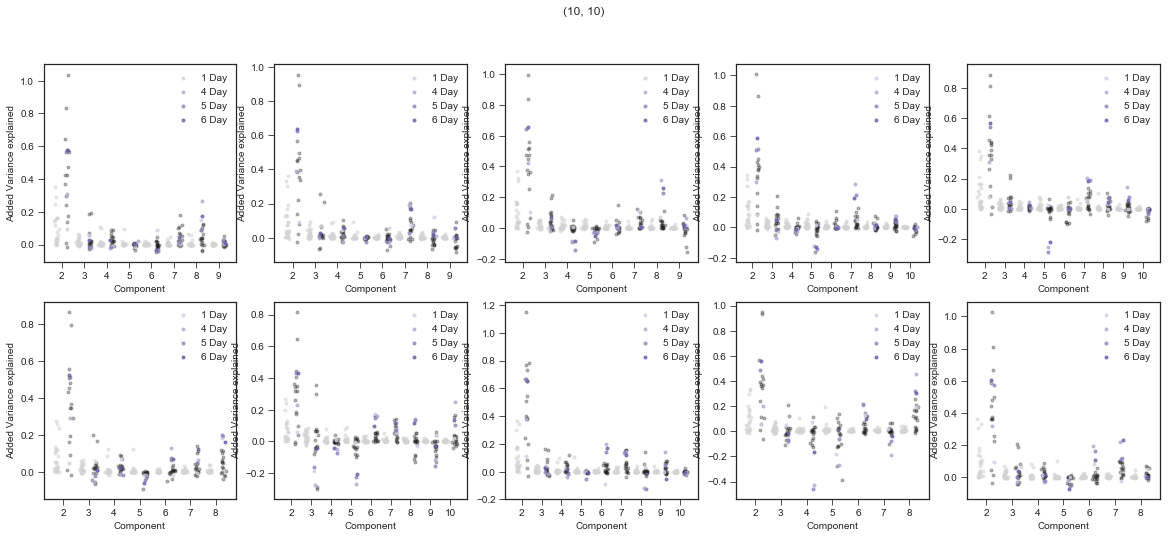

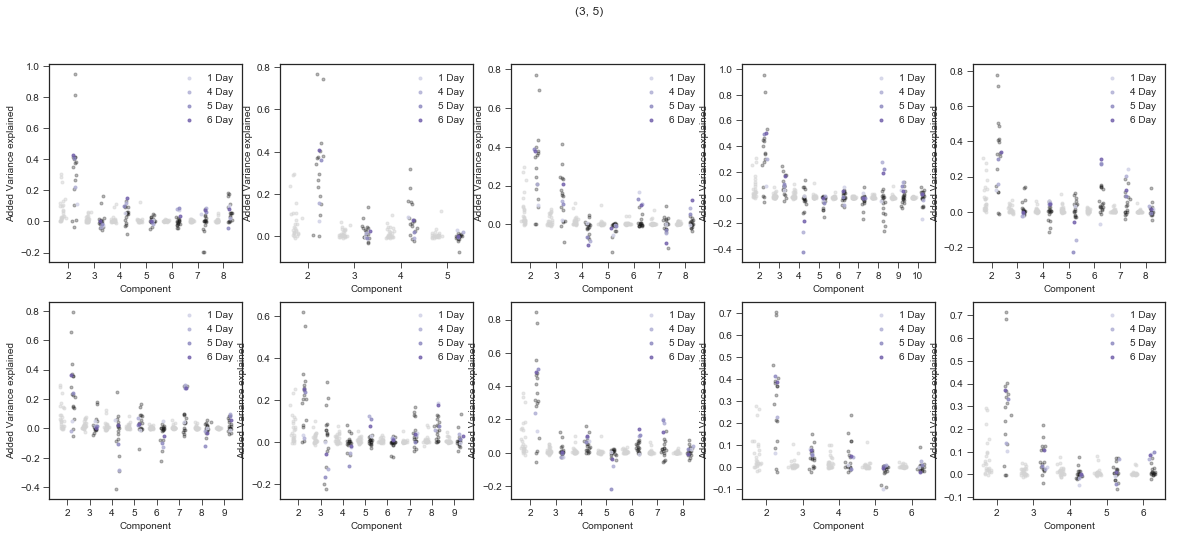

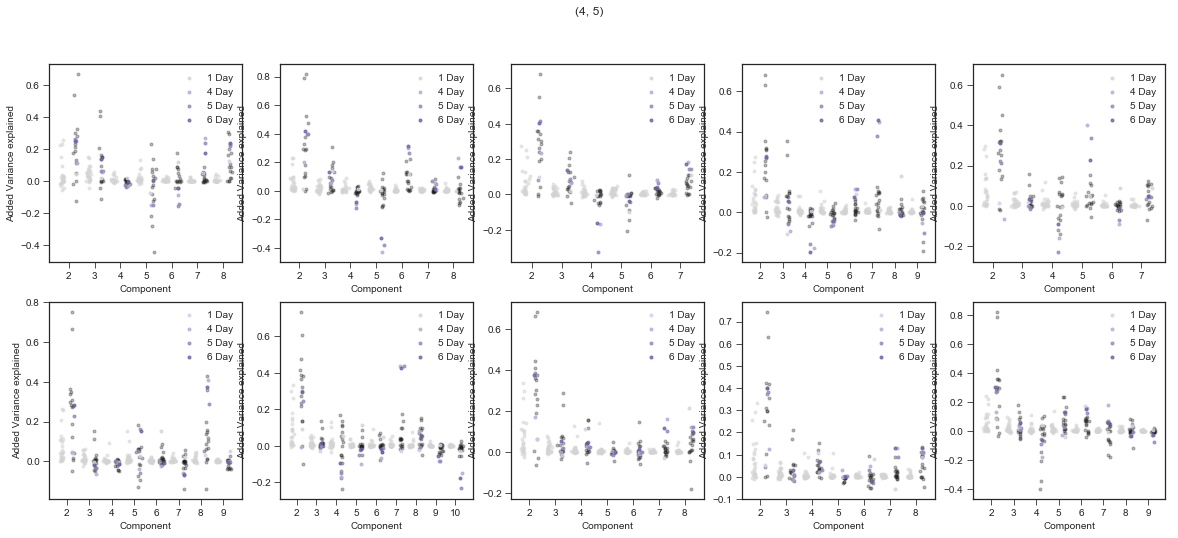

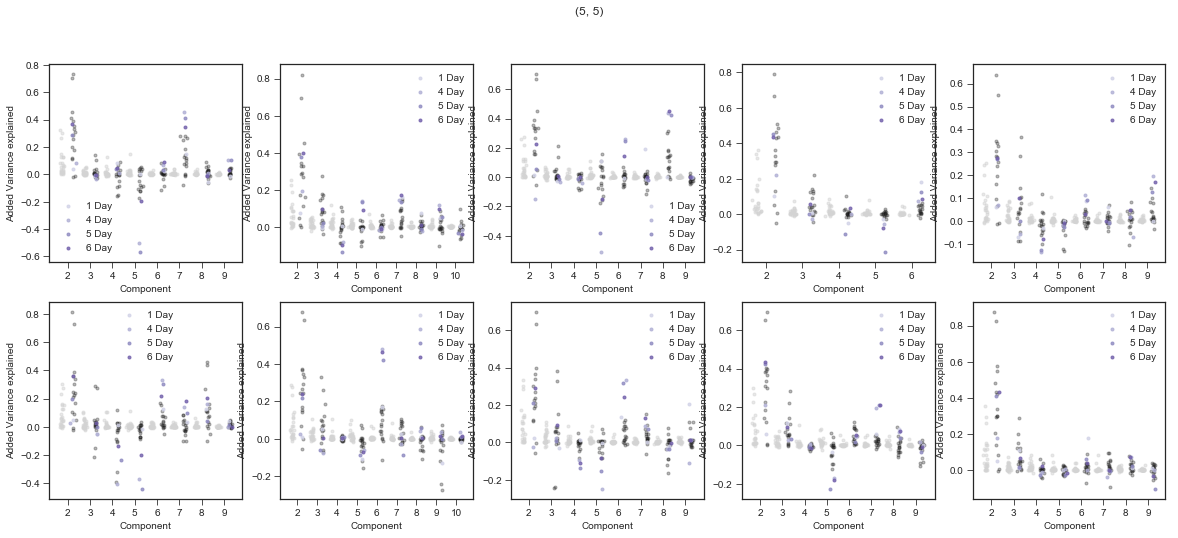

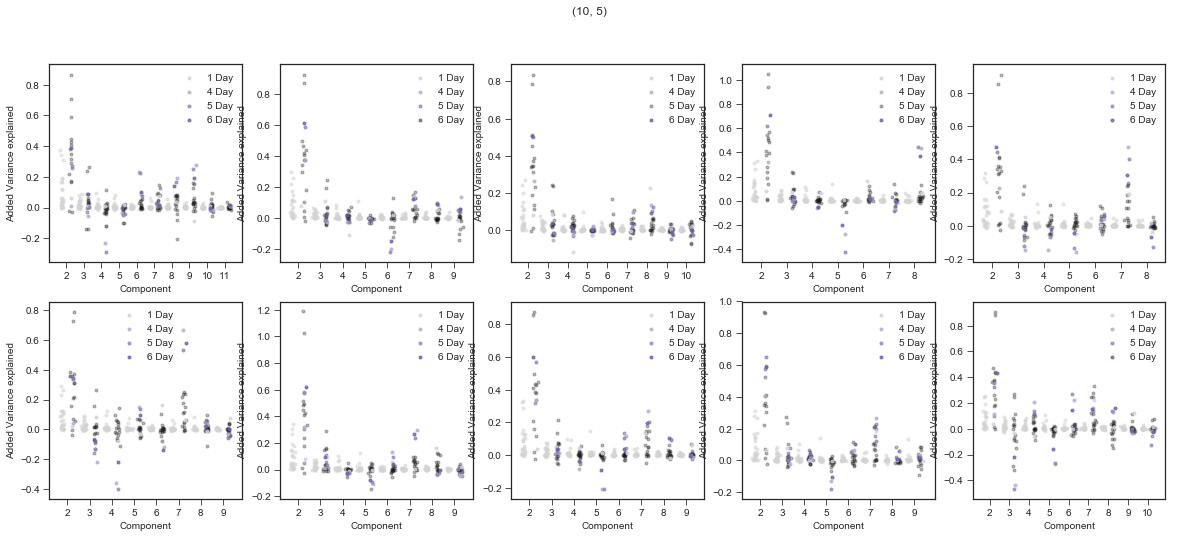

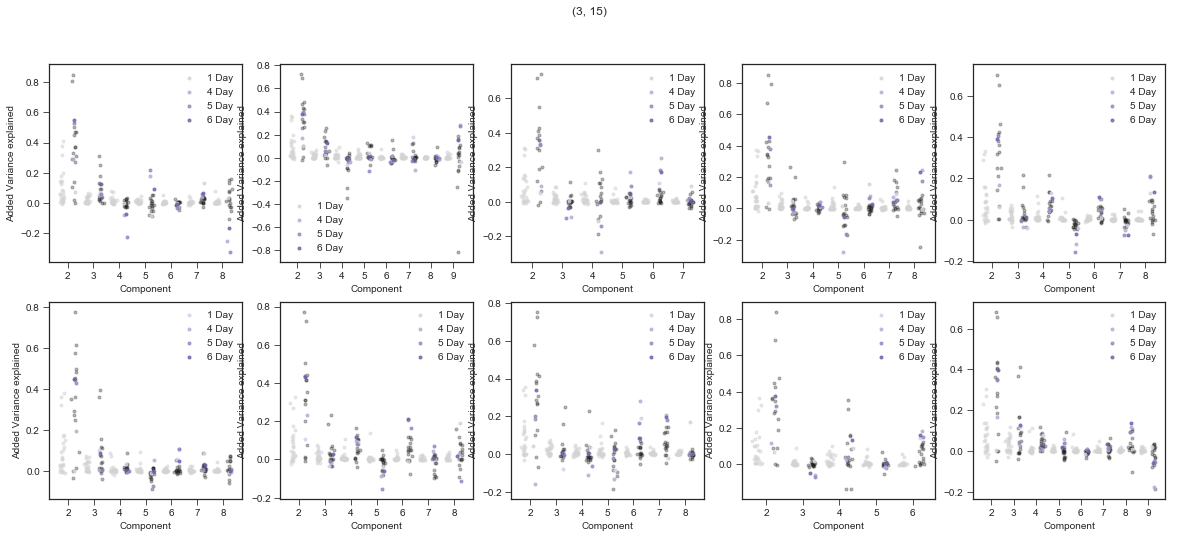

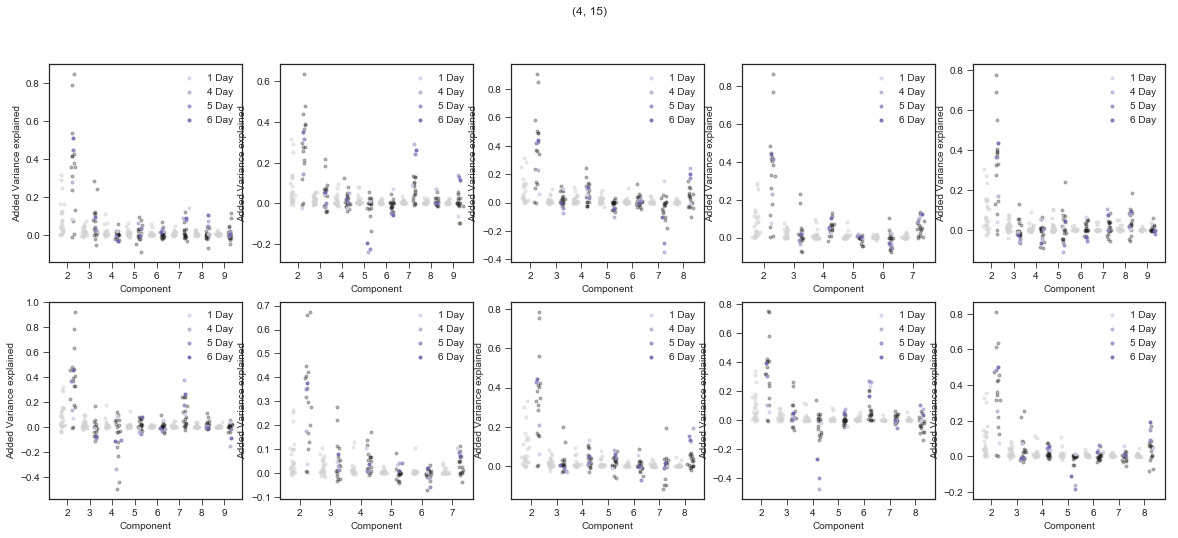

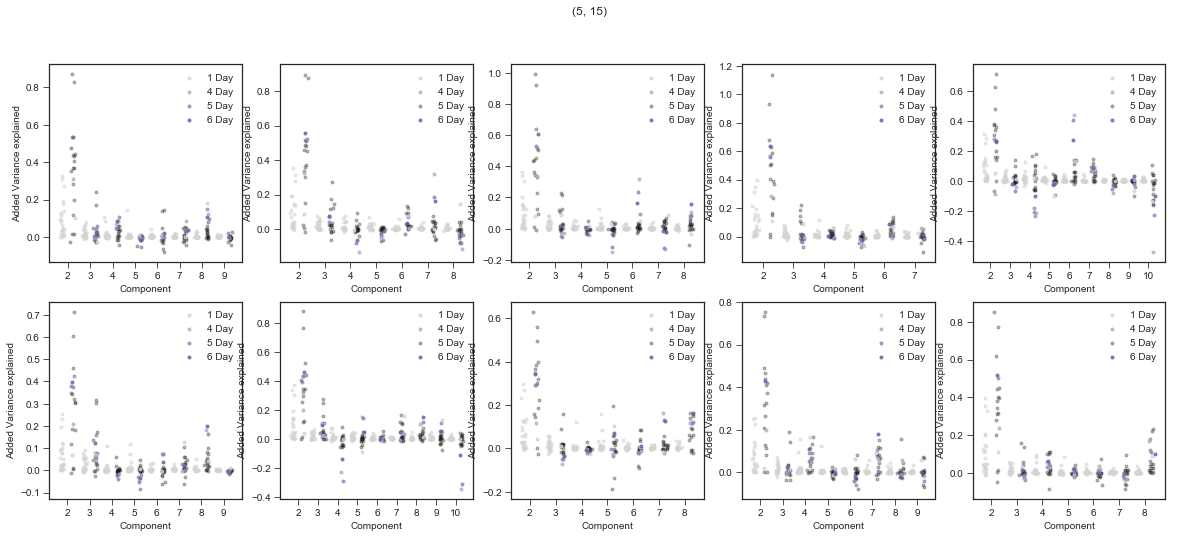

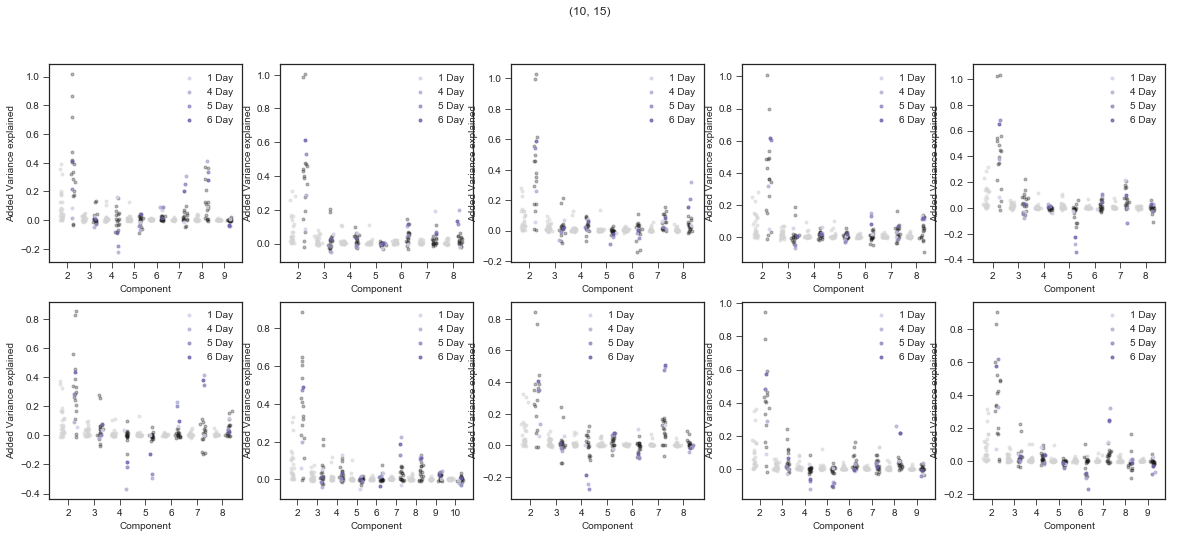

In [56]:
for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    plt.suptitle(f'{(max_train,max_test)}')
    
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        model = datasets[f'{(max_train,max_test)}'][i]['CV_best_rank_index']
        
        end = model +1 
        
        subtle_swapped =np.asarray(s_fits[f'{(max_train,max_test)}'][i]).swapaxes(0,1)
        fits_swapped =np.asarray(ns_fits[f'{(max_train,max_test)}'][i]).swapaxes(0,1)

        focal_conditions = []

        interesting_locs = np.where(np.isin(test_conditions,interesting_conditions))[0]
        uninteresting_locs = np.where(~np.isin(test_conditions,interesting_conditions))[0]

        for c in range(subtle_swapped.shape[0]):
            plt.scatter([tools.jitter_point(i-0.25,0.05) for i in range(len(np.diff(subtle_swapped[c,:end])))],np.diff(subtle_swapped[c,:end]),color='lightgray',alpha=0.5,marker='.')

        for c in uninteresting_locs:
            plt.scatter([tools.jitter_point(i+0.25,0.05) for i in range(len(np.diff(fits_swapped[c,:end])))],np.diff(fits_swapped[c,:end]),color='k',alpha=0.3,marker='.')

        plt.xticks(range(fits_swapped.shape[1]-1),range(2,fits_swapped.shape[1]+2))
        plt.ylabel('Added Variance explained')

        # plt.plot(np.mean(np.diff(fits_swapped[uninteresting_locs,:],axis=1),axis=0),'k',label='Average')
        for c,col in zip(interesting_locs,interesting_conditions):
            plt.scatter([tools.jitter_point(i+0.25,0.05) for i in range(len(np.diff(fits_swapped[c,:end])))],np.diff(fits_swapped[c,:end]),
                        color=condition_colorset[col.replace('_fitness','')],marker='.',alpha=0.8,label=renamed_conditions[col.replace('_fitness','')])
        #     plt.plot(np.diff(fits_swapped[c,:]),label=renamed_conditions[col.replace('_fitness','')],color=condition_colorset[col.replace('_fitness','')],marker='o',linestyle='',alpha=0.7)
        plt.legend()
        plt.xticks(range(end-1),range(2,end+1))
        plt.ylabel('Added Variance explained')
        plt.xlabel('Component')
        # plt.yscale('log')

        plt.savefig(f'robustness/addedVE_1456Day_{max_train}_{max_test}_unweighted.pdf',bbox_inches='tight')



In [ ]:
interesting_locs = np.where(np.isin(test_conditions,interesting_conditions))[0]
uninteresting_locs = np.where(~np.isin(test_conditions,interesting_conditions))[0]



(max_train,max_test) = param_list[1]

for trial in range(n_trials):


    dataset = datasets[f'{(max_train,max_test)}'][trial]

    train_conditions = dataset['train_conditions']
    test_conditions = dataset['test_conditions']

    train  = dataset['train']
    test = dataset['test']

    this_fitness  = dataset['this_fitness']
    this_error  = dataset['this_error']

    model = dataset['CV_best_rank_index']

    end = model +1 

    subtle_swapped =np.asarray(s_fits[f'{(max_train,max_test)}'][trial]).swapaxes(0,1)
    fits_swapped =np.asarray(ns_fits[f'{(max_train,max_test)}'][trial]).swapaxes(0,1)

    for c,condition in zip(interesting_locs,interesting_conditions):
        large_components = np.where(np.diff(fits_swapped[c,:end])[2:] > 0.1)[0]

        for component in large_components:

            model_list = [component+3-1,component+3]

            model_colors = ['k','lightgray','r']

            all_conditions = train_conditions + test_conditions

            all_bcs = sorted(list(dataset['training_bcs'])+list(dataset['testing_bcs']))

            testing_bcs = list(dataset['testing_bcs'])

            these_bcs = testing_bcs

            these_genes = this_data[this_data['barcode'].isin(these_bcs)]['mutation_type'].values
            gene_bc = np.asarray([f'{gene} ({bc})' for bc,gene in zip(these_bcs,these_genes)])
            gene_bc = np.asarray([f'{gene}' for bc,gene in zip(these_bcs,these_genes)])

            condition_loc = np.where(np.isin(all_conditions,condition))[0][0]

            this_f = this_fitness[np.where(np.isin(all_bcs,these_bcs))[0]]
            this_e = this_error[np.where(np.isin(all_bcs,these_bcs))[0]]

            fits = []

            for m,model in enumerate(model_list):

                new_mut_locs = dataset['mut_locs'][model][test[1]]
                old_cond_locs = dataset['cond_locs'][model][train[0]]
                new_cond_locs = dataset['cond_locs'][model][test[0]]   
                these_sigmas = dataset['dimension_weights'][model]
                these_sigmas = these_sigmas[:model+1,:model+1]

                new_fits = [np.abs(np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T))[bc,condition_loc-old_cond_locs.shape[0]]-this_f[bc,condition_loc])/this_e[bc,condition_loc] for bc in range(len(these_bcs))]

                sorting  = np.argsort(new_fits)

                fits.append(new_fits)

        #         data = (np.asarray(fits[0])-np.asarray(fits[1]))/(np.asarray(fits[0]))
        #         data = (np.asarray(fits[0])-np.asarray(fits[1]))
            data = np.asarray(fits[1])-np.asarray(fits[0])
            sorting = np.argsort(data)
            data = data[sorting]
            sorted_genes = these_genes[sorting]

            fig = plt.figure(figsize=(15,3))
            gs = GridSpec(1, 2, width_ratios=[12, 3])
            ax1 = fig.add_subplot(gs[0])
            
            plt.title(f'{(max_train,max_test)} {trial} {condition}')
            
#             plt.subplot(122)

            plt.scatter(range(len(data)),data,marker='o',color=[mutant_colorset[gene] for gene in sorted_genes])


            plt.axhline(0,color='k',linestyle=':')
            plt.xticks(range(len(these_bcs)),gene_bc[sorting],rotation=90)

            ymin = -1.0
            ymax = 4.0
            plt.ylabel(f'Improvement from {model_list[0]+1} to {model_list[1]+1}')

            plt.xlim(-1,len(these_bcs))
            ymin,ymax = plt.ylim()
            

            for i in range(int(np.ceil(len(these_bcs)/4))):
                if (i % 2) == 0:
                    # print(i)
                    rect = matplotlib.patches.Rectangle((0+4*i-0.5,ymin),4,ymax-ymin,
                                                    linewidth=0,edgecolor='gray',facecolor='gray',alpha=0.07)
                    plt.gca().add_patch(rect)
                    
            
            
            ax2 = fig.add_subplot(gs[1])
            
#             model_list = [0,component+3]
            
            mut_locs = dataset['mut_locs'][component+3]
        
            these_genes = this_data[this_data['barcode'].isin(all_bcs)]['mutation_type'].values
            
            for bc in range(mut_locs.shape[0]):
                plt.scatter(mut_locs[bc,0],mut_locs[bc,component+3],color=mutant_colorset[these_genes[bc]],marker='o',alpha=0.4)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
dataset = datasets['subtle_to_strong_wothers']
n_perms = 100
weighted= True
ymax = 1.0
ymin = -1.0

all_guesses = dataset['CV_all_guesses']
both_old = dataset['both_old']
dhats = dataset['dhats']
this_fitness = dataset['this_fitness']
this_error = dataset['this_error']
train  = dataset['train']
test = dataset['test']
both_new = dataset['both_new']
guesses = dataset['guesses']
model = dataset['CV_best_rank_index']
test_conditions  = dataset['test_conditions']
train_conditions = dataset['train_conditions']


nonsubtle_fits = []
subtle_fits = []
overall_subtle = []
overall_nonsubtle = []

model_list = [0,]
    model_colors = ['k','lightgray','r']

    all_conditions = train_conditions + test_conditions


    all_bcs = sorted(list(dataset['training_bcs'])+list(dataset['testing_bcs']))

    testing_bcs = list(dataset['testing_bcs'])

    these_bcs = testing_bcs

    these_genes = this_data[this_data['barcode'].isin(these_bcs)]['mutation_type'].values
    gene_bc = np.asarray([f'{gene} ({bc})' for bc,gene in zip(these_bcs,these_genes)])
    gene_bc = np.asarray([f'{gene}' for bc,gene in zip(these_bcs,these_genes)])


    for condition in interesting_conditions:

        condition_loc = np.where(np.isin(all_conditions,condition))[0][0]

        this_f = this_fitness[np.where(np.isin(all_bcs,these_bcs))[0]]
        this_e = this_error[np.where(np.isin(all_bcs,these_bcs))[0]]



        fits = []

        for m,model in enumerate(model_list):

            new_mut_locs = dataset['mut_locs'][model][test[1]]
            old_cond_locs = dataset['cond_locs'][model][train[0]]
            new_cond_locs = dataset['cond_locs'][model][test[0]]   
            these_sigmas = dataset['dimension_weights'][model]
            these_sigmas = these_sigmas[:model+1,:model+1]

            new_fits = [np.abs(np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T))[bc,condition_loc-old_cond_locs.shape[0]]-this_f[bc,condition_loc])/this_e[bc,condition_loc] for bc in range(len(these_bcs))]

            sorting  = np.argsort(new_fits)

            fits.append(new_fits)

        data = (np.asarray(fits[1])-np.asarray(fits[2]))/(np.asarray(fits[1]))
        data = (np.asarray(fits[1])-np.asarray(fits[2]))
        data = np.asarray(fits[2])-np.asarray(fits[1])
        sorting = np.argsort(data)
        data = data[sorting]
        sorted_genes = these_genes[sorting]

        plt.figure(figsize=(12,6))
        plt.subplot(211)
        plt.title(renamed_conditions[condition.replace('_fitness','')])

        for m,model in enumerate(model_list):
            sorted_fits = np.asarray(fits[m])[sorting]
            plt.scatter(range(len(sorted_fits)),sorted_fits,marker='o',color=model_colors[m],label=f'{model+1} components')

        plt.xticks([])
        plt.legend()

        plt.xlim(-1,len(these_bcs))
        ymin,ymax = plt.ylim()

        for i in range(int(np.ceil(len(these_bcs)/4))):
            if (i % 2) == 0:
                # print(i)
                rect = matplotlib.patches.Rectangle((0+4*i-0.5,ymin),4,ymax-ymin,
                                                linewidth=0,edgecolor='gray',facecolor='gray',alpha=0.07)

                plt.gca().add_patch(rect)

        plt.subplot(212)

        plt.scatter(range(len(data)),data,marker='o',color=[mutant_colorset[gene] for gene in sorted_genes])


        plt.axhline(0,color='k',linestyle=':')
        plt.xticks(range(len(these_bcs)),gene_bc[sorting],rotation=90)

        ymin = -1.0
        ymax = 4.0
        plt.ylabel(f'Improvement from {model_list[1]+1} to {model_list[2]+1}')

        plt.xlim(-1,len(these_bcs))
        ymin,ymax = plt.ylim()

        for i in range(int(np.ceil(len(these_bcs)/4))):
            if (i % 2) == 0:
                # print(i)
                rect = matplotlib.patches.Rectangle((0+4*i-0.5,ymin),4,ymax-ymin,
                                                linewidth=0,edgecolor='gray',facecolor='gray',alpha=0.07)

                plt.gca().add_patch(rect)

    #     toohigh = np.where(data>ymax)[0]
    #     low_counter = 0
    #     for entry in toohigh:
    #         plt.annotate("", xy=(entry, ymax), xytext=(entry, ymax-0.1*(ymax-ymin)),arrowprops=dict(arrowstyle="->",lw=1.5,color=mutant_colorset[sorted_genes[entry]]))
        plt.savefig(f'improvement_by_mutant_{condition}_{model_list[1]+1}_to_{model_list[2]+1}.pdf',bbox_inches='tight')

In [78]:
def SVD_predictions_train_test_weighted(data,train,test,
                                        permuted_mutants=False,permuted_conditions=False,
                                        mse=False,by_condition=False,by_mutant=False,error=None,likelihood=False,
                                        weighted_by_type=True,types=None):
    
    """ 
    Bi-cross validation using multiple folds of data matrix. 

    Method from Owen and Perry 2009.

    For each fold, we have the following data matrix:

                        "new conditions"  "old conditions"
    "new mutants"              A                  B
    "old mutants"              C                  D

    We first perform SVD on the D sub-matrix (using only old mutants and old conditions).
    For every pseudo inverse rank k approximation of D (denoted by D_k^+), we matrix multiply B * D_k^+ * C which gives the best estimate for A from the D_k approximation.

    We then evaluate prediction ability use the residual (eqn 3.3 from Owen and Perry 2009):

        A - B * D_k^+ * C 

    """

    train_c = train[0]
    train_m = train[1]

    test_c = test[0]
    test_m = test[1]

    this_data = data
    
    assert len(train_m) + len(test_m) == this_data.shape[0]
    assert len(train_c) + len(test_c) == this_data.shape[1]

    max_rank = min([len(train_c),len(train_m)])

    fits_by_condition = []
    fits_by_mutant = []
    mean_fits =[]

    if permuted_mutants and permuted_conditions:
        this_data = copy.copy(data)
        this_data[train_m,train_c] = np.random.permutation(this_data[train_m,train_c].ravel()).reshape(len(train_m),len(train_c))
        subset = this_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].ravel()

    elif permuted_mutants:
        this_data = copy.copy(data)
        for mut in train_m:
            this_data[mut,train_c] = np.random.permutation(this_data[mut,train_c])

    elif permuted_conditions:

        this_data = np.swapaxes(copy.copy(data),0,1)
        for cond in train_c:
            this_data[cond,train_m] = np.random.permutation(this_data[cond,train_m])
        this_data = np.swapaxes(this_data,0,1)

    else:
        this_data = copy.copy(data)
        
    if weighted_by_type:
        train_count,train_inv_count = count_matrix(types[train_m],this_data[train_m,:])
        test_count,test_inv_count = count_matrix(types[test_m],this_data[test_m,:])
        
        order = np.argsort(np.concatenate((train_m,test_m)))
        
        all_count = np.concatenate((train_count,test_count))[order]
        all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]
        
        weighted_data = np.multiply(all_inv_count,this_data)
    else:
        train_count = np.ones(this_data[train_m,:].shape)
        train_inv_count = np.ones(this_data[train_m,:].shape)
        test_count = np.ones(this_data[test_m,:].shape)
        test_inv_count = np.ones(this_data[test_m,:].shape)
        
        order = np.argsort(np.concatenate((train_m,test_m)))
        
        all_count = np.concatenate((train_count,test_count))[order]
        all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]
        
        weighted_data = copy.copy(this_data)
        
    both_old = weighted_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].reshape(len(train_m),len(train_c))
    both_old_unweighted = this_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].reshape(len(train_m),len(train_c))

    U2, s2, V2 = np.linalg.svd(both_old)
    
    mut_new = weighted_data[np.repeat(test_m,len(train_c)),np.tile(train_c,len(test_m))].reshape(len(test_m),len(train_c))  
    cond_new = weighted_data[np.repeat(train_m,len(test_c)),np.tile(test_c,len(train_m))].reshape(len(train_m),len(test_c))
    both_new = weighted_data[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))
    
    both_new_unweighted = this_data[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))

    if likelihood:
        both_new_error = error[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))

    mean_mutant_prediction = np.repeat(np.mean(mut_new,axis=1),len(test_c)).reshape(len(test_m),len(test_c))

    if mse:
        mean_fits = np.sum(np.square(both_new-mean_mutant_prediction))
    elif likelihood:
        mean_fits = log_likelihood(mean_mutant_prediction,both_new,both_new_error)
    else: 
        mean_fits = tools.var_explained(both_new,mean_mutant_prediction)[0]

    mean_fits_by_condition = []

    if by_condition:
        for k in range(len(test_c)):
            if mse:
                mean_fits_by_condition.append(np.sum(np.square(both_new[:,k]-mean_mutant_prediction[:,k])))
            elif likelihood:
                mean_fits_by_condition.append(log_likelihood(mean_mutant_prediction[:,k],both_new[:,k],both_new_error[:,k]))
            else:
                mean_fits_by_condition.append(tools.var_explained(both_new[:,k],mean_mutant_prediction[:,k])[0])


    fit_by_rank = []
    guesses = []
    dhats = []
    for rank in range(1,max_rank+1):

        new_s = np.asarray(list(s2[:rank]) + list(np.zeros(s2[rank:].shape)))
        S2 = np.zeros((U2.shape[0],V2.shape[0]))
        S2[:min([U2.shape[0],V2.shape[0]]),:min([U2.shape[0],V2.shape[0]])] = np.diag(new_s)

        D_hat = np.dot(U2[:,:rank],np.dot(S2,V2)[:rank,:])
        A_hat = test_count[:,:len(test_c)]*np.dot(mut_new,np.dot(np.linalg.pinv(D_hat),cond_new))

        dhats.append(D_hat)

        guesses.append(A_hat)
        if mse:
            fit_by_rank.append(np.sum(np.square(both_new_unweighted-A_hat)))

        else:
            fit_by_rank.append(tools.var_explained(both_new_unweighted,A_hat)[0])

        fits_by_condition.append([])
        fits_by_mutant.append([])

        if by_condition:
            for k in range(len(test_c)):
                if mse:
                    fits_by_condition[rank-1].append(np.sum(np.square(both_new[:,k]-A_hat[:,k])))
                elif likelihood:
                    fits_by_condition[rank-1].append(log_likelihood(mean_mutant_prediction[:,k],both_new[:,k],both_new_error[:,k]))
                else:
                    fits_by_condition[rank-1].append(tools.var_explained(both_new_unweighted[:,k],A_hat[:,k])[0])
        if by_mutant: 
            for j in range(len(test_m)):
                if mse:
                    fits_by_mutant[rank-1].append(np.sum(np.square(both_new[j,:]-A_hat[j,:])))
                elif likelihood:
                    fits_by_mutant[rank-1].append(log_likelihood(mean_mutant_prediction[j,:],both_new[j,:],both_new_error[j,:]))
                else:
                    fits_by_mutant[rank-1].append(tools.var_explained(both_new_unweighted[j,:],A_hat[j,:])[0])

        
    return fit_by_rank, fits_by_condition, fits_by_mutant, mean_fits, mean_fits_by_condition, guesses, dhats, both_old

In [59]:
def var_explained_weighted_by_type(data,model,types,exceptions={'adaptive_other':1,'Diploid_adaptive':1}):

    counts = np.unique(np.asarray(types),return_counts=True)

    like_type_count_dict = {mut_type:count for mut_type,count in zip(*counts)}

    like_type_counts = [like_type_count_dict[mut_type] if mut_type not in exceptions.keys() else exceptions[mut_type] for mut_type in types]

    if len(data.shape) > 1:
        like_type_counts = np.repeat(like_type_counts,data.shape[1]).reshape(len(like_type_counts),data.shape[1])

    ss_res = np.sum((data-model)**2/like_type_counts)
    ss_tot = np.sum((data-np.mean(data))**2/like_type_counts)

    return 1 - ss_res/ss_tot, ss_res, ss_tot

In [15]:
def count_matrix(types,data,exceptions={'adaptive_other':1,'Diploid_adaptive':1}):
    
    counts = np.unique(np.asarray(types),return_counts=True)

    like_type_count_dict = {mut_type:count for mut_type,count in zip(*counts)}

    like_type_counts = [like_type_count_dict[mut_type] if mut_type not in exceptions.keys() else exceptions[mut_type] for mut_type in types]
    
    inv_like_type_counts = np.reciprocal(like_type_counts,dtype=np.float)

    if len(data.shape) > 1:
        like_type_counts = np.repeat(like_type_counts,data.shape[1]).reshape(len(like_type_counts),data.shape[1])
        inv_like_type_counts = np.repeat(inv_like_type_counts,data.shape[1]).reshape(len(inv_like_type_counts),data.shape[1])
    
    return like_type_counts,inv_like_type_counts

In [16]:
the_data = this_data[this_data['barcode'].isin(training_bcs)]
types = the_data['mutation_type'].values
the_data = the_data[sorted_m3_cols]

counts,inv_counts = count_matrix(types,the_data)

weighted_data = np.multiply(the_data,inv_counts)


In [79]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')



train_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])
test_cols = list(sorted_nonm3_cols[first_nonsubtle:])

fitness_cols = train_cols + test_cols

fitness = this_data[fitness_cols].values

n_mutants = fitness.shape[0]
n_conditions = fitness.shape[1]

train_conditions = train_cols
train_locs = np.where(np.isin(fitness_cols,train_conditions))[0]

test_conditions = test_cols
test_locs = np.where(np.isin(fitness_cols,test_conditions))[0]

all_locs = sorted(list(train_locs)+list(test_locs))

used_mutants = [bc for bc in this_data['barcode'].values if bc in (list(training_bcs) + list(testing_bcs))]

all_mut_locs =sorted(list(np.where(np.isin(this_data['barcode'].values,used_mutants))[0]))

this_fitness = fitness[all_mut_locs,:][:,all_locs]
new_train_locs = np.where(np.isin(all_locs,train_locs))[0]
new_test_locs = np.where(np.isin(all_locs,test_locs))[0]  

train = [new_train_locs,np.where(np.isin(used_mutants,training_bcs))[0]]
test = [new_test_locs,np.where(np.isin(used_mutants,testing_bcs))[0]]

train_c = train[0]
train_m = train[1]

test_c = test[0]
test_m = test[1]

this_data = this_data[this_data['barcode'].isin(used_mutants)]
types = this_data['mutation_type'].values
# this_data = this_data[list(sorted_m3_cols)+list(sorted_nonm3_cols)].values
print(this_fitness.shape)

a = SVD_predictions_train_test_weighted(this_fitness,train,test,weighted_by_type=False,types=types)
b = tools.SVD_predictions_train_test(this_fitness,train,test)
c = SVD_predictions_train_test_weighted(this_fitness,train,test,weighted_by_type=True,types=types)



(115, 45)


In [64]:
c

16

In [82]:
c

([0.19527701182841484,
  0.6696562843544978,
  0.7161874472374796,
  0.7199486905477857,
  0.6916200258199743,
  0.7000613095588939,
  0.7011721228390948,
  0.718884333434109,
  0.7350051829952078,
  0.7368271743400794,
  0.7226607813944499,
  0.7230471513760546,
  0.7219251061111961,
  0.7131097850499838,
  0.6798474033421378,
  0.6759022677614608,
  0.6439068842881772,
  0.5838796917477431,
  0.5448344645402791,
  0.5515977700486654,
  0.48921044365112887,
  0.41905478077565417,
  0.2732046744675001,
  0.14611848717885478,
  0.11525166929796249],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 0.020202590783575003,
 [],
 [array([[ 1.25608241,  1.22576268,  0.68342324, ...,  0.02142235,
          -0.49129433, -0.52379639],
         [ 

In [31]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')


train_c = train[0]
train_m = train[1]

test_c = test[0]
test_m = test[1]

this_data = this_data[this_data['barcode'].isin(training_bcs+testing_bcs)]
types = this_data['mutation_type'].values

this_data = this_data[list(sorted_m3_cols)+list(sorted_nonm3_cols)].values

train_count,train_inv_count = count_matrix(types[train_m],this_data[train_m,:])
test_count,test_inv_count = count_matrix(types[test_m],this_data[test_m,:])

order = np.argsort(np.concatenate((train_m,test_m)))

all_count = np.concatenate((train_count,test_count))[order]
all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]

weighted_data = np.multiply(all_inv_count,this_data)

order = np.argsort(np.concatenate((train_m,test_m)))
        
all_count = np.concatenate((train_count,test_count))[order]

In [37]:
all_count.shape

(115, 45)

In [38]:
train_count.shape

(42, 45)

In [34]:
test_count

array([[10, 10, 10, ..., 10, 10, 10],
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [10, 10, 10, ..., 10, 10, 10],
       [ 4,  4,  4, ...,  4,  4,  4]])

In [40]:
train_m.shape

(42,)

In [7]:
test_m

NameError: name 'test_m' is not defined